<a href="https://colab.research.google.com/github/tivanello/fase2/blob/main/notebook/Ajustado_TECH_CHALLENGE_FASE_02_Eduardo_Gil_Tivanello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você foi recentemente alocado em uma equipe de cientistas de dados de um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse modelo será usado como insumo para alimentar dashboards internos de tomada de decisão dos analistas quantitativos da empresa.
# Dados
Utilize os dados históricos do índice IBOVESPA, disponíveis publicamente: https://br.investing.com/indices/bovespa-historical-data

# Requisitos:
• Selecione o período “diário”.
• Baixe um intervalo de pelo menos 2 anos de dados.
• Realize o pré-processamento necessário para utilizar os dados no
modelo.

# Objetivo
Criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior ou menor que o do dia atual, ou seja: Seu modelo deve prever a tendência (↑ ou ↓) com acuracidade mínima de 75% em um conjunto de teste. O conjunto de testes deverá conter o último mês (30 dias) de dados disponíveis.

# Entregas Esperadas
Você deverá apresentar ao time de investimentos:
Storytelling Técnico
Apresentação com os seguintes requisitos:
• Aquisição e exploração dos dados;
• Estratégia de engenharia de atributos, caso seja realizado (por exemplo: variações, médias móveis, etc)
• Preparação da base para previsão (definição de target, janela de tempo, etc.);
• Escolha e justificativa do modelo utilizado;
• Resultados e análise de métricas que garantem que o modelo está confiável;

# Justificativa Técnica
Explique claramente:
• Por que você escolheu o(s) modelo(s) utilizados (ex: árvores, regressão logística, LSTM, etc.);
• Como tratou a natureza sequencial dos dados (ex: janelas deslizantes, features lagged);
• Quais os trade-offs entre acuracidade e overfitting.

#Quais documentos devo subir na plataforma? As entregas deverão conter necessariamente:
• Uma pasta zip contendo todos os arquivos do projeto, ou um link para o repositório do GitHub com seu projeto.
• Apresentação do storytelling. Pode ser em PPT, PDF ou ferramentas da sua preferência, como o CANVAS, por exemplo.
• Vídeo de no máximo 5 (cinco) minutos, com uma visão gerencial, explicando como interpretar os resultados obtidos. Note que é necessário que todos os membros do grupo apareçam no vídeo.

**Dica: Utilize o maior intervalo de tempo possível para atingir maior  acuracidade no modelo preditivo.**

Lembre-se que você poderá apresentar o desenvolvimento do seu projeto durante as lives e grupos de estudo com os(as) docentes. Essas são ótimas oportunidades para discutir sobre as dificuldades encontradas, além de pegar dicas valiosas com especialistas e colegas de turma. Não se esqueça que isso é um entregável obrigatório! Se atente para o prazo de entrega até o final da fase.

**Importação dos arquivos.**

 tentei importar toda a série histórica, à partir de 01/08/1994,  porém o arquivo vinha apenas até 10/10/2014. Como solução realizei a importação de  dois arquivos e realizada junção dos dois nas linhas de comando abaixo. Iremos trabalhar com o arquivo com a série hitórica de 01/08/1994 até 01/08/2025

In [228]:
import pandas as pd

# Caminho do arquivo CSV
arquivo1 = '/content/drive/MyDrive/Pos Data Analytics/Fase 2 - Machine Learning and Time Series/Desafio/Dados Históricos - Ibovespa 11-10-2014 01-08-2025.csv'
arquivo2 = '/content/drive/MyDrive/Pos Data Analytics/Fase 2 - Machine Learning and Time Series/Desafio/Dados Históricos - Ibovespa 1994 10-10-2014.csv'

# Carrega os arquivos com tratamento de separadores decimais
df1 = pd.read_csv(arquivo1, thousands='.', decimal=',')
df2 = pd.read_csv(arquivo2, thousands='.', decimal=',')

# Unifica os dados
df_ibovespa = pd.concat([df1, df2], ignore_index=True)






In [229]:
# Visualização das primeiras linhas
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,1082025,132644,132920,133237,132571,"4,88M","-0,32%"
1,31072025,133071,133987,133987,132096,"9,20B","-0,69%"
2,30072025,133990,132702,134368,131883,"8,66B","0,95%"
3,29072025,132726,132130,133346,132130,"6,32B","0,45%"
4,28072025,132129,133538,133902,131550,"6,63B","-1,04%"


Alterar os nomes das colunas retirando o maiusculo e acentuação e Vol. para volume e Var% para variacao. Será necessário instalar a biblioteca unicode ( biblioteca Python que remove acentos e caracteres especiais, convertendo textos para versões ASCII simples)


In [197]:
!pip install unidecode

In [230]:
import unidecode

# Renomeia colunas: remove acentos e converte para minúsculas
df_ibovespa.columns = [unidecode.unidecode(col).lower().replace('vol.', 'volume').replace('var%', 'variacao') for col in df_ibovespa.columns]

# Visualiza o novo nome das colunas
print(df_ibovespa.columns)

Index(['data', 'ultimo', 'abertura', 'maxima', 'minima', 'volume', 'variacao'], dtype='object')


In [231]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,1082025,132644,132920,133237,132571,"4,88M","-0,32%"
1,31072025,133071,133987,133987,132096,"9,20B","-0,69%"
2,30072025,133990,132702,134368,131883,"8,66B","0,95%"
3,29072025,132726,132130,133346,132130,"6,32B","0,45%"
4,28072025,132129,133538,133902,131550,"6,63B","-1,04%"


Analisando o arquivo notei que a data não esta no formato correto, sendo necessária a sua formação


In [232]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   data      7679 non-null   int64 
 1   ultimo    7679 non-null   int64 
 2   abertura  7679 non-null   int64 
 3   maxima    7679 non-null   int64 
 4   minima    7679 non-null   int64 
 5   volume    7678 non-null   object
 6   variacao  7679 non-null   object
dtypes: int64(5), object(2)
memory usage: 420.1+ KB


In [233]:
# Verifica se há avlores Nulos

df_ibovespa[df_ibovespa["volume"].isnull()]

,data,ultimo,abertura,maxima,minima,volume,variacao
2354,10022016,40377,40592,40592,39960,NaN,"-0,53%"


In [234]:
# Corrige a coluna 'data' para string de 8 dígitos (DDMMYYYY)
df_ibovespa['data'] = df_ibovespa['data'].astype(str).str.zfill(8)
df_ibovespa['data'] = pd.to_datetime(df_ibovespa['data'], format='%d%m%Y')

# Ordena por data
df_ibovespa = df_ibovespa.sort_values(by='data').reset_index(drop=True)

# cria a coluna de formato brasileiro (DD/MM/AAAA)
df_ibovespa['data_br'] = df_ibovespa['data'].dt.strftime('%d/%m/%Y')

In [235]:
# 2) Converter variacao (texto) -> número
df_ibovespa["variacao_num"] = (
    df_ibovespa["variacao"].astype(str)
        .str.replace("%", "", regex=False)
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
        .astype(float) / 100.0
)




In [236]:
# função para converter o dados da coluna volume em valor
def converter_volume(valor):
    if isinstance(valor, str):
        valor = valor.replace(',', '.').strip()
        if valor.endswith('K'):
            return float(valor.replace('K', '')) * 1e3
        elif valor.endswith('M'):
            return float(valor.replace('M', '')) * 1e6
        elif valor.endswith('B'):
            return float(valor.replace('B', '')) * 1e9
        else:
            return float(valor)
    return valor  # já numérico

# Aplicar a função
df_ibovespa['volume'] = df_ibovespa['volume'].apply(converter_volume)

# Preencher valores ausentes com o valor da linha anterior
df_ibovespa['volume'] = df_ibovespa['volume'].fillna(method='ffill')


/tmp/ipython-input-3680603689.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ibovespa['volume'] = df_ibovespa['volume'].fillna(method='ffill')


In [237]:
#Converter colunas para float64
colunas_float = ['ultimo', 'abertura', 'maxima', 'minima']
df_ibovespa[colunas_float] = df_ibovespa[colunas_float].astype(float)

In [238]:
df_ibovespa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          7679 non-null   datetime64[ns]
 1   ultimo        7679 non-null   float64       
 2   abertura      7679 non-null   float64       
 3   maxima        7679 non-null   float64       
 4   minima        7679 non-null   float64       
 5   volume        7679 non-null   float64       
 6   variacao      7679 non-null   object        
 7   data_br       7679 non-null   object        
 8   variacao_num  7679 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 540.1+ KB


In [239]:
df_ibovespa.tail()

,data,ultimo,abertura,maxima,minima,volume,variacao,data_br,variacao_num
7674,2025-07-28,132129.0,133538.0,133902.0,131550.0,6.630000e+09,"-1,04%",28/07/2025,-0.0104
7675,2025-07-29,132726.0,132130.0,133346.0,132130.0,6.320000e+09,"0,45%",29/07/2025,0.0045
7676,2025-07-30,133990.0,132702.0,134368.0,131883.0,8.660000e+09,"0,95%",30/07/2025,0.0095
7677,2025-07-31,133071.0,133987.0,133987.0,132096.0,9.200000e+09,"-0,69%",31/07/2025,-0.0069
7678,2025-08-01,132644.0,132920.0,133237.0,132571.0,4.880000e+06,"-0,32%",01/08/2025,-0.0032


In [240]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao,data_br,variacao_num
0,1994-08-01,4152.0,4201.0,4223.0,4091.0,5.390000e+09,"-1,17%",01/08/1994,-0.0117
1,1994-08-02,4311.0,4152.0,4311.0,4152.0,6.630000e+09,"3,83%",02/08/1994,0.0383
2,1994-08-03,4392.0,4311.0,4426.0,4275.0,6.880000e+09,"1,88%",03/08/1994,0.0188
3,1994-08-04,4355.0,4392.0,4406.0,4321.0,5.670000e+09,"-0,84%",04/08/1994,-0.0084
4,1994-08-05,4470.0,4355.0,4476.0,4329.0,5.140000e+09,"2,64%",05/08/1994,0.0264


In [241]:
df_ibovespa.isnull().sum()

,0
data,0
ultimo,0
abertura,0
maxima,0
minima,0
volume,0
variacao,0
data_br,0
variacao_num,0


Necessidade de criar a minha variável de tendência, onde:

1 = O fechamento do IBOVESPA no dia seguinte será maior que o de hoje (alta)

0 = O fechamento do IBOVESPA no dia seguinte será igual ou menor que o de hoje (sem alta)

In [242]:
# Criao meu target - Tendência

import numpy as np

# Criar a variável target com base no fechamento (ultimo)
prox = df_ibovespa["ultimo"].shift(-1)

df_ibovespa["tendencia"] = np.where(
    prox.notna(),
    (prox > df_ibovespa["ultimo"]).astype(int),
    np.nan
)

# Remover a última linha (que fica sem target válido)
df_ibovespa = df_ibovespa.dropna(subset=["tendencia"]).copy()
df_ibovespa["tendencia"] = df_ibovespa["tendencia"].astype(int)





In [243]:
df_ibovespa.tail()

,data,ultimo,abertura,maxima,minima,volume,variacao,data_br,variacao_num,tendencia
7673,2025-07-25,133524.0,133820.0,134204.0,133285.0,5.560000e+09,"-0,21%",25/07/2025,-0.0021,0
7674,2025-07-28,132129.0,133538.0,133902.0,131550.0,6.630000e+09,"-1,04%",28/07/2025,-0.0104,1
7675,2025-07-29,132726.0,132130.0,133346.0,132130.0,6.320000e+09,"0,45%",29/07/2025,0.0045,1
7676,2025-07-30,133990.0,132702.0,134368.0,131883.0,8.660000e+09,"0,95%",30/07/2025,0.0095,0
7677,2025-07-31,133071.0,133987.0,133987.0,132096.0,9.200000e+09,"-0,69%",31/07/2025,-0.0069,0


## Estratégia de Engenharia de Atributos (Features) — IBOVESPA

A ideia das features abaixo é transformar o “preço puro” (**ultimo**) em sinais de **tendência, força do movimento, risco/instabilidade, padrão de candle, volume e sazonalidade**.  
Todas as variáveis foram construídas **usando apenas informações do passado (até o dia t)**, sem olhar o futuro.

---

**1) Retornos (variação percentual do preço)**  
Medem quanto o preço mudou em janelas curtas. São bons para capturar **momento**.

- **retorno_1d**: variação percentual de 1 dia (**pct_change(1)**). Representa o comportamento **de ontem para hoje**.
- **retorno_3d**: variação percentual acumulada em 3 dias (**pct_change(3)**). Representa tendência de **curtíssimo prazo**.
- **retorno_7d**: variação percentual acumulada em 7 dias (**pct_change(7)**). Representa sinal de tendência **semanal**.

---

**2) Médias móveis (suavização do preço)**  
Servem para reduzir ruído do preço diário e enxergar a direção geral em janelas curtas.

- **media_movel_3**: média do fechamento (**ultimo**) dos últimos **3 pregões** (**rolling(window=3).mean()**). Suaviza ruídos de curtíssimo prazo.
- **media_movel_7**: média do fechamento (**ultimo**) dos últimos **7 pregões** (**rolling(window=7).mean()**). Mostra direção geral da semana (tendência curta).

---

**3) Volatilidade (instabilidade / risco)**  
Volatilidade aqui é o **desvio padrão** do fechamento em janelas curtas: quanto mais alto, mais instável.

- **volatilidade_3d**: desvio padrão do fechamento (**ultimo**) nos últimos **3 pregões** (**rolling(window=3).std()**). Mede instabilidade **muito recente**.
- **volatilidade_7d**: desvio padrão do fechamento (**ultimo**) nos últimos **7 pregões** (**rolling(window=7).std()**). Mede instabilidade **semanal**.

---

**4) RSI (Relative Strength Index) — força do movimento**  
Mede a velocidade/força do movimento recente (0 a 100). Ajuda a captar **sobrecompra/sobrevenda**.

- **rsi_14**: RSI com janela de **14 dias** (**RSIIndicator(close=ultimo, window=14).rsi()**). Em geral:  
  - RSI > 70 sugere **sobrecompra** (pode perder força / possível reversão)  
  - RSI < 30 sugere **sobrevenda** (pode reagir / possível reversão)

---

**5) MACD (12-26-9) — tendência por médias exponenciais**  
Indicador de tendência baseado na diferença entre médias móveis exponenciais. Ajuda a identificar **mudança de direção**.

- **macd**: linha principal do MACD (**EMA12 − EMA26**). Positivo costuma indicar tendência de **alta**; negativo, **baixa**.
- **macd_signal**: linha de sinal (**EMA9 do macd**). Cruzamentos com **macd** indicam possíveis mudanças de tendência.
- **macd_diff**: histograma (**macd − macd_signal**). Mostra a **força** do sinal: quanto maior o valor absoluto, maior a “convicção”.

---

**6) Distância do preço para as médias (tendência relativa)**  
Mostra se o preço está “esticado” para cima/baixo em relação à média. Útil para detectar **afastamento** e possíveis correções.

- **dist_mm_3**: distância percentual do preço para a média móvel de 3 dias (**(ultimo / media_movel_3) - 1**).  
  > 0: preço acima da média; < 0: abaixo.
- **dist_mm_7**: distância percentual do preço para a média móvel de 7 dias (**(ultimo / media_movel_7) - 1**).  
  Mesma lógica, mas em janela semanal.
- **cruz_mm_3_7**: relação entre médias de 3 e 7 dias (**(media_movel_3 / media_movel_7) - 1**).  
  > 0: média curta acima da semanal (tendência mais positiva); < 0: o contrário.

---

**7) Candle features (padrão do pregão em % do preço)**  
Usam **abertura**, **maxima**, **minima** e **ultimo**. Representam a “forma” do candle e capturam pressão compradora/vendedora no dia.

- **amplitude_pct**: amplitude do dia normalizada (**(maxima - minima) / ultimo**). Mede o “tamanho do dia” (volatilidade intradiária).
- **corpo_pct**: tamanho do corpo do candle (**(ultimo - abertura) / abertura**).  
  > 0: fechou acima da abertura; < 0: fechou abaixo.
- **sombra_sup_pct**: sombra superior (**(maxima - max(abertura, ultimo)) / ultimo**). Indica rejeição no topo (tentou subir e voltou).
- **sombra_inf_pct**: sombra inferior (**(min(abertura, ultimo) - minima) / ultimo**). Indica rejeição no fundo (tentou cair e voltou).

---

**8) Volume features (força do movimento)**  
Volume ajuda a diferenciar movimentos “fracos” de movimentos com maior participação do mercado.

- **volume_ret_1d**: variação percentual do volume de ontem para hoje (**volume.pct_change(1)**).
- **volume_mm_7**: média móvel de 7 dias do volume (**volume.rolling(7).mean()**). Representa o “volume típico” da semana.

---

**9) Calendário (sazonalidade)**  
Captura padrões por dia da semana e mês que às vezes aparecem em séries financeiras.

- **dow**: dia da semana (**data.dt.dayofweek**), onde 0=segunda … 4=sexta.
- **month**: mês (**data.dt.month**), de 1 a 12.

---

**Limpeza final (dropna)**  
Após criar as features, algumas linhas iniciais ficam com **NaN** por causa de **pct_change(...)**, **rolling(...)** e indicadores (RSI/MACD), que precisam de histórico.  
Por isso removemos apenas as linhas que ainda têm **NaN** nas colunas de features, garantindo uma base consistente para treino/teste.


In [145]:
!pip install ta

In [244]:
import numpy as np
import pandas as pd
import ta

# ============================================================
# FEATURES - IBOVESPA (df_ibovespa)
# ============================================================

# ============================================================
# 1) Retornos
# ============================================================
if "retorno_1d" not in df_ibovespa.columns:
    df_ibovespa["retorno_1d"] = df_ibovespa["ultimo"].pct_change(1)

if "retorno_3d" not in df_ibovespa.columns:
    df_ibovespa["retorno_3d"] = df_ibovespa["ultimo"].pct_change(3)

if "retorno_7d" not in df_ibovespa.columns:
    df_ibovespa["retorno_7d"] = df_ibovespa["ultimo"].pct_change(7)

# ============================================================
# 2) Médias móveis
# ============================================================
if "media_movel_3" not in df_ibovespa.columns:
    df_ibovespa["media_movel_3"] = df_ibovespa["ultimo"].rolling(window=3).mean()

if "media_movel_7" not in df_ibovespa.columns:
    df_ibovespa["media_movel_7"] = df_ibovespa["ultimo"].rolling(window=7).mean()

# ============================================================
# 3) Volatilidade
# ============================================================
if "volatilidade_3d" not in df_ibovespa.columns:
    df_ibovespa["volatilidade_3d"] = df_ibovespa["ultimo"].rolling(window=3).std()

if "volatilidade_7d" not in df_ibovespa.columns:
    df_ibovespa["volatilidade_7d"] = df_ibovespa["ultimo"].rolling(window=7).std()

# ============================================================
# 4) Indicadores técnicos (RSI + MACD)
# ============================================================
if "rsi_14" not in df_ibovespa.columns:
    df_ibovespa["rsi_14"] = ta.momentum.RSIIndicator(
        close=df_ibovespa["ultimo"], window=14
    ).rsi()

# ============================================================
# 5) MACD (12-26-9)
# ===========================================================

if not all(c in df_ibovespa.columns for c in ["macd", "macd_signal", "macd_diff"]):
    macd = ta.trend.MACD(close=df_ibovespa["ultimo"])
    df_ibovespa["macd"] = macd.macd()
    df_ibovespa["macd_signal"] = macd.macd_signal()
    df_ibovespa["macd_diff"] = macd.macd_diff()

# ============================================================
# 6) Distância do preço para as médias (tendência relativa)
# ============================================================

df_ibovespa["dist_mm_3"] = (df_ibovespa["ultimo"] / df_ibovespa["media_movel_3"]) - 1
df_ibovespa["dist_mm_7"] = (df_ibovespa["ultimo"] / df_ibovespa["media_movel_7"]) - 1
df_ibovespa["cruz_mm_3_7"] = (df_ibovespa["media_movel_3"] / df_ibovespa["media_movel_7"]) - 1

# ============================================================
# 7) Candle features (usa abertura/máxima/mínima/fechamento=ultimo)
# Tudo em % do preço (normalizado)
# ============================================================

if all(c in df_ibovespa.columns for c in ["abertura", "maxima", "minima", "ultimo"]):
    df_ibovespa["amplitude_pct"] = (df_ibovespa["maxima"] - df_ibovespa["minima"]) / df_ibovespa["ultimo"]
    df_ibovespa["corpo_pct"] = (df_ibovespa["ultimo"] - df_ibovespa["abertura"]) / df_ibovespa["abertura"]

    topo = df_ibovespa[["abertura", "ultimo"]].max(axis=1)
    fundo = df_ibovespa[["abertura", "ultimo"]].min(axis=1)

    df_ibovespa["sombra_sup_pct"] = (df_ibovespa["maxima"] - topo) / df_ibovespa["ultimo"]
    df_ibovespa["sombra_inf_pct"] = (fundo - df_ibovespa["minima"]) / df_ibovespa["ultimo"]

# ============================================================
# 8) Volume features
# ============================================================
if "volume" in df_ibovespa.columns:
    df_ibovespa["volume_ret_1d"] = df_ibovespa["volume"].pct_change(1)
    df_ibovespa["volume_mm_7"] = df_ibovespa["volume"].rolling(7).mean()

# ============================================================
# 9) Calendário
# ============================================================

df_ibovespa["dow"] = df_ibovespa["data"].dt.dayofweek
df_ibovespa["month"] = df_ibovespa["data"].dt.month

# ============================================================
# LIMPEZA FINAL: remover NaNs gerados por rolling/shift/indicadores
# (limpa apenas o necessário: todas as colunas de features)
# ============================================================

features_cols = [
    "retorno_1d","retorno_3d","retorno_7d",
    "media_movel_3","media_movel_7",
    "volatilidade_3d","volatilidade_7d",
    "rsi_14","macd","macd_signal","macd_diff",
    "dist_mm_3","dist_mm_7","cruz_mm_3_7",
    "amplitude_pct","corpo_pct","sombra_sup_pct","sombra_inf_pct",
    "volume_ret_1d","volume_mm_7",
    "dow","month",
    "variacao_num",
]

# mantém só as que existem (se alguma coluna não existir no df)
features_cols = [c for c in features_cols if c in df_ibovespa.columns]

df_ibovespa = df_ibovespa.dropna(subset=features_cols).copy()

print("OK - Features prontas.")
print("Qtd linhas:", len(df_ibovespa))
print("Qtd features:", len(features_cols))
print("Features:", features_cols)


OK - Features prontas.
Qtd linhas: 7645
Qtd features: 23
Features: ['retorno_1d', 'retorno_3d', 'retorno_7d', 'media_movel_3', 'media_movel_7', 'volatilidade_3d', 'volatilidade_7d', 'rsi_14', 'macd', 'macd_signal', 'macd_diff', 'dist_mm_3', 'dist_mm_7', 'cruz_mm_3_7', 'amplitude_pct', 'corpo_pct', 'sombra_sup_pct', 'sombra_inf_pct', 'volume_ret_1d', 'volume_mm_7', 'dow', 'month', 'variacao_num']


Verificar se as minhas novas variáveis foram criadas

In [245]:
print(df_ibovespa.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7645 entries, 33 to 7677
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             7645 non-null   datetime64[ns]
 1   ultimo           7645 non-null   float64       
 2   abertura         7645 non-null   float64       
 3   maxima           7645 non-null   float64       
 4   minima           7645 non-null   float64       
 5   volume           7645 non-null   float64       
 6   variacao         7645 non-null   object        
 7   data_br          7645 non-null   object        
 8   variacao_num     7645 non-null   float64       
 9   tendencia        7645 non-null   int64         
 10  retorno_1d       7645 non-null   float64       
 11  retorno_3d       7645 non-null   float64       
 12  retorno_7d       7645 non-null   float64       
 13  media_movel_3    7645 non-null   float64       
 14  media_movel_7    7645 non-null   float64    

**verificar estatísticas básicas**, valores extremos e possíveis erros visíveis

In [221]:
df_ibovespa.describe()

,data,ultimo,abertura,maxima,minima,volume,variacao_num,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
count,7645,7645.00000,7645.000000,7645.000000,7645.000000,7.645000e+03,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000
mean,2010-02-27 22:15:05.062132224,53152.86985,53137.320340,53657.213473,52624.846697,1.670445e+09,0.000621,0.520863,0.000621,0.001854,0.004189,53136.123392,53102.736915,532.240745,785.942328,52.796160,120.130401,120.736134,-0.605733
min,1994-09-16 00:00:00,2138.00000,2138.000000,2449.000000,2110.000000,1.121000e+05,-0.158100,0.000000,-0.158090,-0.254273,-0.335406,2372.333333,2618.428571,3.055050,14.005101,13.245486,-12092.405368,-10303.426794,-3250.441270
25%,2002-06-17 00:00:00,14779.00000,14761.000000,14925.000000,14524.000000,3.610000e+06,-0.009100,0.000000,-0.009112,-0.015163,-0.022324,14712.000000,14704.000000,170.642902,300.743444,43.847157,-308.738512,-288.988713,-124.304700
50%,2010-03-03 00:00:00,51902.00000,51867.000000,52494.000000,51377.000000,1.146000e+07,0.000800,1.000000,0.000827,0.002384,0.005382,51905.333333,51980.571429,382.089431,645.715071,52.703164,99.682084,102.760286,4.481579
75%,2017-11-16 00:00:00,73367.00000,73268.000000,74254.000000,72390.000000,2.825600e+08,0.010800,1.000000,0.010836,0.019851,0.032240,73176.000000,73079.428571,739.358506,1068.047729,61.916191,611.143428,588.799178,124.342466
max,2025-07-31 00:00:00,141264.00000,141265.000000,141564.000000,140597.000000,5.406000e+10,0.334200,1.000000,0.334190,0.459561,0.511766,140560.666667,139777.142857,9945.164269,11770.815506,87.526295,4184.425241,3476.717814,2289.282082
std,NaN,38482.59470,38475.048537,38754.716942,38200.301214,3.995644e+09,0.020048,0.499597,0.020048,0.034682,0.049434,38470.639217,38449.433933,530.756822,683.738467,12.237942,1059.234305,1002.358839,305.484082


Verificação de valores ausentes

In [246]:
print(df_ibovespa.isnull().sum())

data               0
ultimo             0
abertura           0
maxima             0
minima             0
volume             0
variacao           0
data_br            0
variacao_num       0
tendencia          0
retorno_1d         0
retorno_3d         0
retorno_7d         0
media_movel_3      0
media_movel_7      0
volatilidade_3d    0
volatilidade_7d    0
rsi_14             0
macd               0
macd_signal        0
macd_diff          0
dist_mm_3          0
dist_mm_7          0
cruz_mm_3_7        0
amplitude_pct      0
corpo_pct          0
sombra_sup_pct     0
sombra_inf_pct     0
volume_ret_1d      0
volume_mm_7        0
dow                0
month              0
dtype: int64


**Análisar do balanceamento da variável alvo (tendencia)**


In [247]:
df_ibovespa['tendencia'].value_counts(normalize=True)


,proportion
tendencia,
1,0.520863
0,0.479137


Sem desbalanceamento preocupante no conjunto completo (52% vs. 48%);

Isso aumenta a confiança do modelo que pode aprender padrões sem precisar de balanceamento artificial, desde que a divisão entre treino e teste também esteja proporcional.

**Análisar do balanceamento da variável alvo (tendencia) no conjuntoi de teste**

In [248]:
# Separação
df_teste = df_ibovespa[df_ibovespa['tendencia'].notna()].tail(30)


# Verificar balanceamento no teste
df_teste['tendencia'].value_counts(normalize=True)


,proportion
tendencia,
0,0.6
1,0.4


O conjunto de teste está desbalanceado

Mesmo que o conjunto completo esteja equilibrado (52% vs. 48%), os últimos 30 pregões — que é a parte que irei vai usar para avaliar a performance do modelo está desbalanceados, com predomínio de quedas 60/40.

In [249]:
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True).copy()

df_treino = df_ibovespa.iloc[:-30].copy()
df_teste  = df_ibovespa.iloc[-30:].copy()

print(df_teste["tendencia"].value_counts(normalize=True))



tendencia
0    0.6
1    0.4
Name: proportion, dtype: float64


In [250]:
df_ibovespa.describe()

,data,ultimo,abertura,maxima,minima,volume,variacao_num,tendencia,retorno_1d,retorno_3d,...,dist_mm_7,cruz_mm_3_7,amplitude_pct,corpo_pct,sombra_sup_pct,sombra_inf_pct,volume_ret_1d,volume_mm_7,dow,month
count,7645,7645.00000,7645.000000,7645.000000,7645.000000,7.645000e+03,7645.000000,7645.000000,7645.000000,7645.000000,...,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7.645000e+03,7645.000000,7645.000000
mean,2010-02-27 22:15:05.062132224,53152.86985,53137.320340,53657.213473,52624.846697,1.670445e+09,0.000621,0.520863,0.000621,0.001854,...,0.001387,0.000854,0.023181,0.000560,0.004665,0.004934,0.242173,1.671649e+09,1.997253,6.501112
min,1994-09-16 00:00:00,2138.00000,2138.000000,2449.000000,2110.000000,1.121000e+05,-0.158100,0.000000,-0.158090,-0.254273,...,-0.221818,-0.136526,0.003243,-0.157792,-0.009768,-0.017899,-0.981334,8.392529e+05,0.000000,1.000000
25%,2002-06-17 00:00:00,14779.00000,14761.000000,14925.000000,14524.000000,3.610000e+06,-0.009100,0.000000,-0.009112,-0.015163,...,-0.011624,-0.007893,0.013926,-0.009134,0.000447,0.000298,-0.164884,3.598571e+06,1.000000,4.000000
50%,2010-03-03 00:00:00,51902.00000,51867.000000,52494.000000,51377.000000,1.146000e+07,0.000800,1.000000,0.000827,0.002384,...,0.002408,0.001596,0.019219,0.000743,0.002953,0.003110,-0.006766,1.154143e+07,2.000000,7.000000
75%,2017-11-16 00:00:00,73367.00000,73268.000000,74254.000000,72390.000000,2.825600e+08,0.010800,1.000000,0.010836,0.019851,...,0.016328,0.010640,0.027210,0.010675,0.006850,0.006777,0.188474,2.943400e+08,3.000000,9.000000
max,2025-07-31 00:00:00,141264.00000,141265.000000,141564.000000,140597.000000,5.406000e+10,0.334200,1.000000,0.334190,0.459561,...,0.202603,0.136696,0.294205,0.338956,0.081065,0.119939,1146.574819,2.069857e+10,4.000000,12.000000
std,NaN,38482.59470,38475.048537,38754.716942,38200.301214,3.995644e+09,0.020048,0.499597,0.020048,0.034682,...,0.026346,0.017339,0.016397,0.019939,0.005701,0.006776,13.147891,3.786638e+09,1.411294,3.419311


In [251]:
# Lista apenas as variáveis preditoras
colunas_features = [
    # Retornos
    "retorno_1d", "retorno_3d", "retorno_7d",

    # Médias móveis
    "media_movel_3", "media_movel_7",

    # Volatilidade
    "volatilidade_3d", "volatilidade_7d",

    # Indicadores técnicos
    "rsi_14", "macd", "macd_signal", "macd_diff",

    # Distância para médias (tendência relativa)
    "dist_mm_3", "dist_mm_7", "cruz_mm_3_7",

    # Candle features (se existirem abertura/maxima/minima)
    "amplitude_pct", "corpo_pct", "sombra_sup_pct", "sombra_inf_pct",

    # Volume (se existir coluna volume)
    "volume_ret_1d", "volume_mm_7",

    # Calendário
    "dow", "month",

    # Variação numérica (se existir variacao)
    "variacao_num",
]


# Descrever estatísticas com mais percentis
df_ibovespa[colunas_features].describe(percentiles=[.01, .25, .5, .75, .99])


,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,...,cruz_mm_3_7,amplitude_pct,corpo_pct,sombra_sup_pct,sombra_inf_pct,volume_ret_1d,volume_mm_7,dow,month,variacao_num
count,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,...,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7.645000e+03,7645.000000,7645.000000,7645.000000
mean,0.000621,0.001854,0.004189,53136.123392,53102.736915,532.240745,785.942328,52.796160,120.130401,120.736134,...,0.000854,0.023181,0.000560,0.004665,0.004934,0.242173,1.671649e+09,1.997253,6.501112,0.000621
std,0.020048,0.034682,0.049434,38470.639217,38449.433933,530.756822,683.738467,12.237942,1059.234305,1002.358839,...,0.017339,0.016397,0.019939,0.005701,0.006776,13.147891,3.786638e+09,1.411294,3.419311,0.020048
min,-0.158090,-0.254273,-0.335406,2372.333333,2618.428571,3.055050,14.005101,13.245486,-12092.405368,-10303.426794,...,-0.136526,0.003243,-0.157792,-0.009768,-0.017899,-0.981334,8.392529e+05,0.000000,1.000000,-0.158100
1%,-0.051747,-0.096900,-0.134997,3797.133333,3797.382857,19.147496,51.901088,25.681702,-2586.273060,-2436.441712,...,-0.052798,0.006369,-0.052010,0.000000,0.000000,-0.638486,1.207452e+06,0.000000,1.000000,-0.051736
25%,-0.009112,-0.015163,-0.022324,14712.000000,14704.000000,170.642902,300.743444,43.847157,-308.738512,-288.988713,...,-0.007893,0.013926,-0.009134,0.000447,0.000298,-0.164884,3.598571e+06,1.000000,4.000000,-0.009100
50%,0.000827,0.002384,0.005382,51905.333333,51980.571429,382.089431,645.715071,52.703164,99.682084,102.760286,...,0.001596,0.019219,0.000743,0.002953,0.003110,-0.006766,1.154143e+07,2.000000,7.000000,0.000800
75%,0.010836,0.019851,0.032240,73176.000000,73079.428571,739.358506,1068.047729,61.916191,611.143428,588.799178,...,0.010640,0.027210,0.010675,0.006850,0.006777,0.188474,2.943400e+08,3.000000,9.000000,0.010800
99%,0.050979,0.090355,0.123893,134526.840000,134548.782857,2255.118011,2966.184407,79.292925,2766.499605,2613.964664,...,0.042722,0.088447,0.051077,0.024512,0.031700,1.955635,1.398429e+10,4.000000,12.000000,0.050956
max,0.334190,0.459561,0.511766,140560.666667,139777.142857,9945.164269,11770.815506,87.526295,4184.425241,3476.717814,...,0.136696,0.294205,0.338956,0.081065,0.119939,1146.574819,2.069857e+10,4.000000,12.000000,0.334200


**Análise da correlação entre as variáveis**

In [252]:
# 1) Split temporal antes (ex.: últimos 30 dias teste)
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True).copy()
df_treino = df_ibovespa.iloc[:-30].copy()
df_teste  = df_ibovespa.iloc[-30:].copy()

# 2) Correlação no TREINO (Pearson)
df_corr_p = df_treino[colunas_features + ["tendencia"]].corr(method="pearson")
print("\nPearson (TREINO) - correlação com tendencia:")
print(df_corr_p["tendencia"].sort_values(ascending=False))

# 3) Correlação no TREINO (Spearman)
df_corr_s = df_treino[colunas_features + ["tendencia"]].corr(method="spearman")
print("\nSpearman (TREINO) - correlação com tendencia:")
print(df_corr_s["tendencia"].sort_values(ascending=False))




Pearson (TREINO) - correlação com tendencia:
tendencia          1.000000
volatilidade_3d    0.019105
volume_mm_7        0.014235
month              0.010647
amplitude_pct      0.008688
volatilidade_7d    0.007904
rsi_14             0.006408
macd               0.002323
macd_signal        0.001956
macd_diff          0.001636
corpo_pct         -0.002140
retorno_1d        -0.002162
variacao_num      -0.002179
dist_mm_3         -0.006621
sombra_inf_pct    -0.007034
sombra_sup_pct    -0.008526
media_movel_7     -0.010138
media_movel_3     -0.010518
volume_ret_1d     -0.010853
dow               -0.015098
retorno_3d        -0.017634
retorno_7d        -0.020294
dist_mm_7         -0.023462
cruz_mm_3_7       -0.030331
Name: tendencia, dtype: float64

Spearman (TREINO) - correlação com tendencia:
tendencia          1.000000
amplitude_pct      0.014526
volume_mm_7        0.012829
macd_signal        0.011861
rsi_14             0.010737
month              0.010694
macd               0.009277
volatil

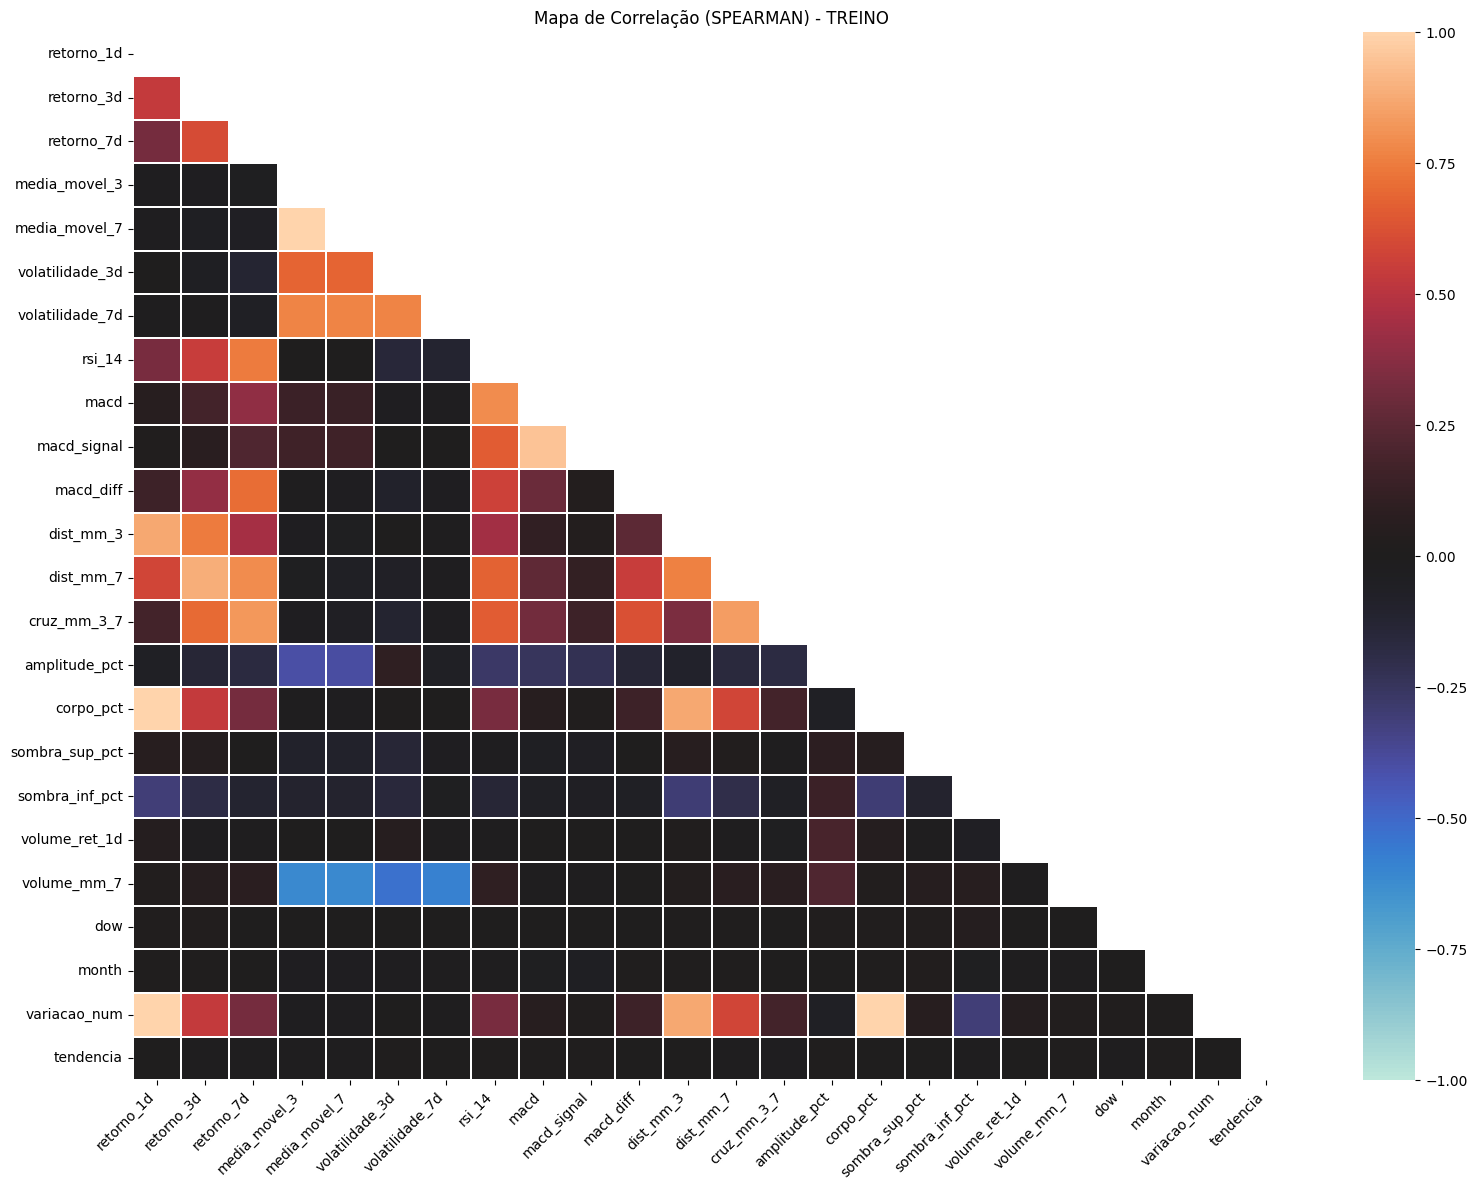

In [255]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Garantir split temporal antes (ex.: últimos 30 dias teste)
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True).copy()
df_treino = df_ibovespa.iloc[:-30].copy()

# 2) Corr (escolha o método: "pearson" ou "spearman")
metodo = "spearman"   # recomendo começar com spearman
df_corr = df_treino[colunas_features + ["tendencia"]].corr(method=metodo)

# 3) Mostrar só metade da matriz (evita duplicação)
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(
    df_corr,
    mask=mask,
    annot=False,
    linewidths=0.3,
    vmin=-1, vmax=1,
    center=0
)
plt.title(f"Mapa de Correlação ({metodo.upper()}) - TREINO")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## Avaliação do Mapa de Correlação (SPEARMAN) — TREINO

O gráfico está adequado para o objetivo: **entender relações entre variáveis preditoras** e reduzir redundância.

### O que o gráfico mostra (na prática)

1) **A variável alvo (tendencia) tem correlação baixa com quase todas as features**  
Isso é comum em séries financeiras: o sinal de “amanhã sobe ou desce” tende a ser **fraco** e frequentemente **não-linear**.  
Conclusão: correlação raramente “explica” o target, mas ajuda a identificar **features duplicadas**.

2) **Há redundância clara entre grupos de variáveis**
O mapa evidencia blocos de variáveis que carregam informação parecida:
- **Retornos** (**pct_change(1)**, **pct_change(3)**, **pct_change(7)**) tendem a se correlacionar entre si.
- **Médias móveis** (**rolling(window=3).mean()**, **rolling(window=7).mean()**) e **distâncias para médias** (**(ultimo / media_movel_3) - 1**, **(ultimo / media_movel_7) - 1**, **(media_movel_3 / media_movel_7) - 1**) também formam um bloco (mesma ideia em formatos diferentes).
- **MACD** (**EMA12 − EMA26**), **macd_signal** (**EMA9 do macd**) e **macd_diff** (**macd − macd_signal**) são derivados do mesmo indicador e, por isso, correlacionam entre si.
- **Features de candle** (**amplitude_pct**, **corpo_pct**, **sombra_sup_pct**, **sombra_inf_pct**) têm relação parcial entre si (todas vêm do mesmo pregão).

Impacto típico de manter tudo junto:
- pouca informação nova (muita repetição)
- mais ruído para o modelo
- maior instabilidade de performance

3) **Spearman é apropriado**
Spearman captura relação **monotônica**, não apenas linear. Em séries financeiras costuma ser mais útil do que Pearson.

---

## Por que usar um “triângulo” no heatmap

### 1) A matriz de correlação é simétrica
A correlação de A com B é igual à correlação de B com A.  
Ou seja, metade do gráfico é repetição. Mostrar apenas um triângulo:
- reduz duplicação
- deixa o gráfico mais limpo
- facilita enxergar blocos de redundância

### 2) Correlação calculada apenas no TREINO
O cálculo no conjunto de treino evita “olhar” o período de teste ao decidir quais features manter ou remover.  
Isso preserva a separação correta:
- TREINO: análise/seleção/ajuste
- TESTE: avaliação final

---

## Ações práticas com base no mapa

A estratégia mais segura é manter **um representante por bloco**, por exemplo:
- Retornos: manter 1 (ex.: **retorno_3d**) e testar se os demais agregam.
- Médias/distâncias: manter **media_movel_7** OU **dist_mm_7** (não os dois) e avaliar.
- MACD: manter só **macd_diff** (primeiro teste), pois costuma concentrar o sinal do cruzamento.
- Candle: manter 1–2 (ex.: **corpo_pct** e **amplitude_pct**).
- Volume: manter **volume_mm_7** e testar se **volume.pct_change(1)** agrega ou só adiciona ruído.
- Calendário: manter **dow**; **month** pode ser testada, mas geralmente tem efeito fraco.

A meta não é “mais colunas”, é **colunas diferentes**, com menos repetição.


## **Implementando as ações práticas com base no mapa de correlação**

O mapa de correlação (Spearman) foi usado para identificar **redundâncias** entre as variáveis (features) e montar conjuntos mais enxutos.  
Em séries financeiras, muitas features carregam a mesma informação com nomes diferentes (ex.: retornos parecidos entre si, médias móveis e distâncias para médias, MACD e derivados). Isso pode aumentar ruído e piorar a generalização.

### Objetivo
Comparar o desempenho de um modelo (Random Forest) usando:
1) um conjunto **enxuto** (um representante por “bloco” de informação),
2) um conjunto **enxuto + algumas variáveis extras** (testes de ganho),
3) o conjunto **completo** (todas as features criadas).

### Por que usar apenas o TREINO para análise e o TESTE para avaliar
A seleção/ajuste deve ser feita com base no TREINO para evitar “olhar” o futuro.  
O TESTE fica reservado para medir o desempenho final.

### Split temporal adotado
Foi utilizado holdout temporal:
- **Treino:** todos os registros, exceto os últimos 30 pregões
- **Teste:** últimos 30 pregões

Isso simula o cenário real: treinar com o passado e prever o futuro.

### Métricas avaliadas
- **Accuracy:** acerto total (pode enganar se as classes estiverem desbalanceadas)
- **Balanced Accuracy:** média do recall das classes (mais justa em desbalanceamento)
- **ROC AUC:** capacidade de separação do modelo (independe do threshold 0.5)

### Estratégia de features (um representante por bloco)
- Retornos: manter 1 retorno e testar os demais
- Médias/distâncias: manter apenas um (média OU distância)
- MACD: manter apenas **macd_diff**
- Candle: manter 1–2 variáveis
- Volume: manter **volume_mm_7** e testar **volume.pct_change(1)**
- Calendário: manter **dow** e testar **month** se necessário

A meta não é ter mais colunas. É ter colunas **diferentes**, com menos repetição.


In [257]:
# Implementando as ações práticas com base no mapa de correlação

import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# ============================================================
# 0) Split temporal (últimos 30 dias como teste)
# ============================================================
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True).copy()

df_treino = df_ibovespa.iloc[:-30].copy()
df_teste  = df_ibovespa.iloc[-30:].copy()

def avaliar_modelo(df_train, df_test, features, nome="modelo"):
    # manter só as features que existem
    feats = [f for f in features if f in df_train.columns and f in df_test.columns]

    X_train = df_train[feats].copy()
    y_train = df_train["tendencia"].copy()
    X_test  = df_test[feats].copy()
    y_test  = df_test["tendencia"].copy()

    # limpar NaNs (segurança)
    train = X_train.join(y_train).dropna()
    test  = X_test.join(y_test).dropna()

    X_train, y_train = train[feats], train["tendencia"]
    X_test,  y_test  = test[feats],  test["tendencia"]

    modelo = RandomForestClassifier(
        n_estimators=600,
        random_state=42,
        class_weight="balanced_subsample"
    )
    modelo.fit(X_train, y_train)

    proba = modelo.predict_proba(X_test)[:, 1]
    pred  = (proba >= 0.5).astype(int)

    acc = accuracy_score(y_test, pred)
    bal = balanced_accuracy_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)

    print("\n" + "="*60)
    print(f"{nome} | feats={len(feats)} | acc={acc:.4f} | bal_acc={bal:.4f} | auc={auc:.4f}")
    print("CM:\n", confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, digits=4))

    return {"modelo": nome, "n_feats": len(feats), "acc": acc, "bal_acc": bal, "auc": auc, "features": feats}


# ============================================================
# 1) Conjunto ENXUTO (um representante por bloco)
# ============================================================
features_lean = [
    # Retorno (1 representante)
    "retorno_3d",

    # Média OU distância (começa com 1 só)
    "dist_mm_7",          # alternativa: "media_movel_7"

    # MACD (1 representante)
    "macd_diff",

    # Candle (1-2)
    "corpo_pct",
    "amplitude_pct",

    # Volume (1 representante)
    "volume_mm_7",

    # Calendário (1)
    "dow",
]

# ============================================================
# 2) LEAN + testes de "vale a pena?"
# ============================================================
features_lean_plus = features_lean + [
    "retorno_1d",          # testar se agrega
    "volatilidade_7d",     # risco semanal
    "rsi_14",              # força do movimento
]

# ============================================================
# 3) FULL (todas as features atuais)
# ============================================================
features_full = colunas_features  # usa sua lista completa

# ============================================================
# Rodar avaliações
# ============================================================
res1 = avaliar_modelo(df_treino, df_teste, features_lean, "RF_LEAN")
res2 = avaliar_modelo(df_treino, df_teste, features_lean_plus, "RF_LEAN_PLUS")
res3 = avaliar_modelo(df_treino, df_teste, features_full, "RF_FULL")



RF_LEAN | feats=7 | acc=0.5000 | bal_acc=0.5139 | auc=0.5417
CM:
 [[ 8 10]
 [ 5  7]]
              precision    recall  f1-score   support

           0     0.6154    0.4444    0.5161        18
           1     0.4118    0.5833    0.4828        12

    accuracy                         0.5000        30
   macro avg     0.5136    0.5139    0.4994        30
weighted avg     0.5339    0.5000    0.5028        30


RF_LEAN_PLUS | feats=10 | acc=0.3000 | bal_acc=0.3056 | auc=0.3866
CM:
 [[ 5 13]
 [ 8  4]]
              precision    recall  f1-score   support

           0     0.3846    0.2778    0.3226        18
           1     0.2353    0.3333    0.2759        12

    accuracy                         0.3000        30
   macro avg     0.3100    0.3056    0.2992        30
weighted avg     0.3249    0.3000    0.3039        30


RF_FULL | feats=11 | acc=0.4000 | bal_acc=0.4028 | auc=0.3958
CM:
 [[ 7 11]
 [ 7  5]]
              precision    recall  f1-score   support

           0     0.5000   

## Próximo ajuste (sem criar feature nova)

**Trocar o threshold (0.5) pelo melhor no treino - Como o AUC é baseado em probabilidade, dá pra melhorar a acurácia/bal_acc só ajustando o corte.

* Ex.: buscar threshold que maximiza balanced_accuracy no treino e aplicar no teste.

## Função `avaliar_modelo()` — avaliação padronizada (com otimização de threshold)

A função **avaliar_modelo()** foi criada para testar modelos de forma consistente, comparando diferentes conjuntos de features (ex.: **LEAN**, **LEAN_PLUS**, **FULL**) usando o mesmo split temporal e as mesmas métricas.

---

### O que a função recebe

- **df_train**: DataFrame do conjunto de **treino** (passado).
- **df_test**: DataFrame do conjunto de **teste** (futuro).
- **features**: lista com os nomes das colunas que serão usadas como variáveis preditoras (X).
- **nome**: nome para identificar o experimento na saída (ex.: `"RF_LEAN"`).
- **otimizar_threshold**: se `True`, ajusta o threshold (corte) usando o **treino** para escolher o melhor ponto de decisão.

---

### O que a função faz (passo a passo)

**1) Filtra features existentes**  
Garante que só serão usadas colunas que realmente existem em **df_train** e **df_test**, evitando erro quando alguma feature não foi criada em uma execução.

**2) Monta X e y**
- **X_train** = df_train[features]
- **y_train** = df_train["tendencia"]
- **X_test** = df_test[features]
- **y_test** = df_test["tendencia"]

**3) Remove NaNs**
Algumas features geram valores ausentes no começo da série (por `rolling`, `pct_change`, RSI, MACD etc.).  
Então a função aplica `dropna()` em treino e teste para manter somente linhas completas.

**4) Treina o modelo (RandomForestClassifier)**
Usa um Random Forest com:
- **n_estimators=600**: quantidade de árvores
- **class_weight="balanced_subsample"**: ajuda quando as classes 0/1 não estão equilibradas

**5) Calcula probabilidades (predict_proba)**
Em vez de prever direto 0/1, o modelo gera probabilidade de classe 1:
- **proba_train**: probabilidade no treino
- **proba_test**: probabilidade no teste

Isso permite ajustar o ponto de corte (threshold) que decide 0 ou 1.

---

### Por que otimizar o threshold?

O padrão é usar **threshold = 0.5**, mas isso


In [261]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score,
    classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier

def avaliar_modelo(df_train, df_test, features, nome="modelo", otimizar_threshold=True):
    # manter só as features que existem
    feats = [f for f in features if f in df_train.columns and f in df_test.columns]

    X_train = df_train[feats].copy()
    y_train = df_train["tendencia"].copy()
    X_test  = df_test[feats].copy()
    y_test  = df_test["tendencia"].copy()

    # limpar NaNs
    train = X_train.join(y_train).dropna()
    test  = X_test.join(y_test).dropna()
    X_train, y_train = train[feats], train["tendencia"]
    X_test,  y_test  = test[feats],  test["tendencia"]

    # modelo (pode ajustar hiperparâmetros aqui depois)
    modelo = RandomForestClassifier(
        n_estimators=600,
        random_state=42,
        class_weight="balanced_subsample"
    )
    modelo.fit(X_train, y_train)

    # probabilidades
    proba_train = modelo.predict_proba(X_train)[:, 1]
    proba_test  = modelo.predict_proba(X_test)[:, 1]

    # threshold padrão
    th_usado = 0.5

    # otimizar threshold no TREINO (com trava: precisa prever as 2 classes)
    if otimizar_threshold:
        ths = np.arange(0.30, 0.71, 0.01)
        melhor_th, melhor_bal = 0.5, -1

        for th in ths:
            pred_train = (proba_train >= th).astype(int)

            # trava: não aceitar thresholds que preveem só uma classe
            if len(np.unique(pred_train)) < 2:
                continue

            bal = balanced_accuracy_score(y_train, pred_train)
            if bal > melhor_bal:
                melhor_bal = bal
                melhor_th = th

        th_usado = melhor_th

    # predição no TESTE com threshold escolhido
    pred = (proba_test >= th_usado).astype(int)

    acc = accuracy_score(y_test, pred)
    bal = balanced_accuracy_score(y_test, pred)
    auc = roc_auc_score(y_test, proba_test)

    print("\n" + "="*60)
    print(f"{nome} | feats={len(feats)} | th={th_usado:.2f} | acc={acc:.4f} | bal_acc={bal:.4f} | auc={auc:.4f}")
    print("CM:\n", confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, digits=4, zero_division=0))

    return {
        "modelo": nome,
        "n_feats": len(feats),
        "th": th_usado,
        "acc": acc,
        "bal_acc": bal,
        "auc": auc,
        "features": feats
    }




In [262]:
res1 = avaliar_modelo(df_treino, df_teste, features_lean, "RF_LEAN", otimizar_threshold=False)
res2 = avaliar_modelo(df_treino, df_teste, features_lean_plus, "RF_LEAN_PLUS", otimizar_threshold=False)
res3 = avaliar_modelo(df_treino, df_teste, features_full, "RF_FULL", otimizar_threshold=False)




RF_LEAN | feats=7 | th=0.50 | acc=0.5000 | bal_acc=0.5139 | auc=0.5417
CM:
 [[ 8 10]
 [ 5  7]]
              precision    recall  f1-score   support

           0     0.6154    0.4444    0.5161        18
           1     0.4118    0.5833    0.4828        12

    accuracy                         0.5000        30
   macro avg     0.5136    0.5139    0.4994        30
weighted avg     0.5339    0.5000    0.5028        30


RF_LEAN_PLUS | feats=10 | th=0.50 | acc=0.3000 | bal_acc=0.3056 | auc=0.3866
CM:
 [[ 5 13]
 [ 8  4]]
              precision    recall  f1-score   support

           0     0.3846    0.2778    0.3226        18
           1     0.2353    0.3333    0.2759        12

    accuracy                         0.3000        30
   macro avg     0.3100    0.3056    0.2992        30
weighted avg     0.3249    0.3000    0.3039        30


RF_FULL | feats=11 | th=0.50 | acc=0.4000 | bal_acc=0.4028 | auc=0.3958
CM:
 [[ 7 11]
 [ 7  5]]
              precision    recall  f1-score   suppo

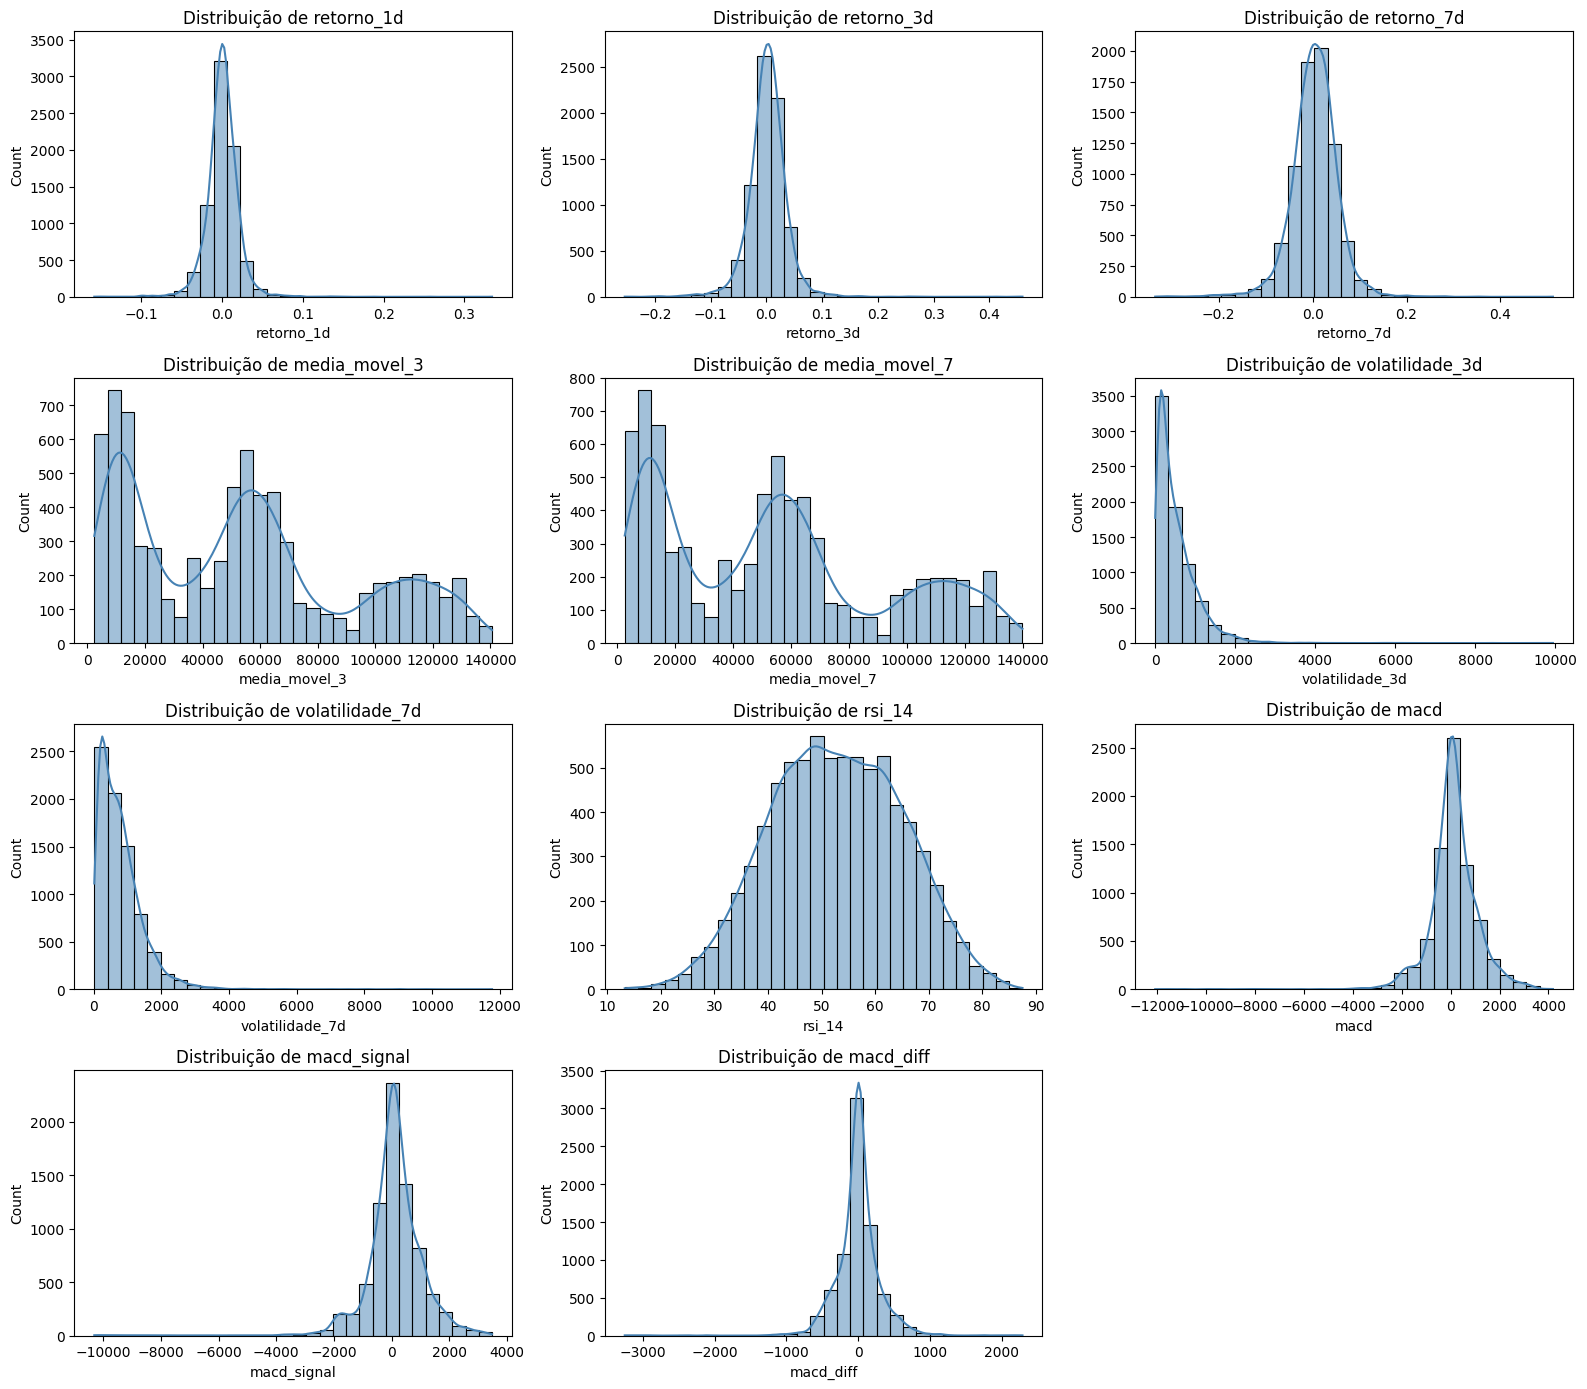

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d', 'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

plt.figure(figsize=(16, 14))
for i, coluna in enumerate(colunas_features, 1):
    plt.subplot(4, 3, i)  # suporta até 12 plots
    sns.histplot(df_ibovespa[coluna], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribuição de {coluna}')
plt.tight_layout()
plt.show()


**Analise dos gráficos:**

**retorno_1d – Variação percentual de 1 dia**
→ Representa: o comportamento do mercado de ontem para hoje

Distribuição:

Aproximadamente normal, centrada em zero

Pequena cauda para ambos os lados

*Interpretação:*

O mercado tende a ter oscilações diárias pequenas, com poucos dias de alta ou queda expressiva

Excelente variável para modelos que captam microvariações diárias

**retorno_3d – Variação percentual de 3 dias**
→ Representa: tendência de curtíssimo prazo

Distribuição:

Levemente mais dispersa que Variação percentual de 1 dia (retorno_1d), mas ainda simétrica

Algumas variações maiores nos extremos

*Interpretação:*

Boa para capturar mudanças mais estruturadas de direção (ex: início de tendência de alta ou queda)

Modelos podem usar essa variável para prever inversões ou continuidade de tendência

**retorno_7d – Variação percentual de 7 dias**
→ Representa: sinal de tendência semanal

Distribuição:

Levemente assimétrica

Mais espalhada, indicando que em uma semana o mercado pode variar mais fortemente

*Interpretação:*

Alta utilidade para detectar acúmulo de ganhos ou perdas

Ideal para modelos que tentam prever reversões ou confirmações semanais

**media_movel_3 – Média dos últimos 3 dias**
→ Representa: suavização de ruídos diários

Distribuição:

Multimodal (com picos claros)

*Interpretação:*

Boa para capturar níveis de suporte e resistência locais

Essencial manter o contexto de tempo, já que os valores absolutos mudam muito com os anos

**media_movel_7 – Média dos últimos 7 dias**
→ Representa: direção geral da semana

Distribuição:

Muito semelhante à de 3 dias, também multimodal

Mais suavizada, mas ainda com vários picos

*Interpretação:*

Pode ajudar o modelo a detectar movimento sustentado

Complementa media_movel_3 ao filtrar oscilações rápidas

**volatilidade_3d – Desvio padrão dos últimos 3 dias**
→ Representa: instabilidade recente (Desvio Padrão)

Distribuição:

Fortemente assimétrica à direita

Muitos dias com baixa volatilidade e poucos com picos extremos

*Interpretação:*

Ajuda a identificar momentos de calmaria vs turbulência

Útil para ajustar expectativa de movimento futuro

**volatilidade_7d – Volatilidade semanal**
→ Representa: variação em uma janela semanal (Desvio Padrão)

Distribuição:

Também assimétrica à direita

Cauda longa com dias de crise/pânico ou euforia

*Interpretação:*

Excelente para detectar movimentos bruscos acumulados

Pode indicar o início ou fim de ciclos fortes




Normalizar os dados usando o **StandardScaler** - Isso garantirá que  modelos sensíveis à escala (como Regressão Logística, SVM, KNN) funcionem corretamente, e os modelos baseados em árvore (como Random Forest e XGBoost) também possam ser comparados sem interferência de escala
* 1º Selecionar as colunas (features)

* 2º Separar a a base de teste (Respeitando a ordem do Tempo) - ultimos 30 dias

* 3º Padronizar (normalizar) os dados com StandardScaler

In [158]:
from sklearn.preprocessing import StandardScaler

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d', 'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar (normalizar) os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)





Verificando o x_treino, x_teste e y_treino, y_teste foram criados

In [159]:
print("X_treino:", X_treino_scaled.shape)
print("X_teste :", X_teste_scaled.shape)
print("y_treino:", y_treino.shape)
print("y_teste :", y_teste.shape)


X_treino: (7615, 11)
X_teste : (30, 11)
y_treino: (7615,)
y_teste : (30,)


Com isto a base esta preparada para a próxima fase.

Agora irei realizar os testes dos modelos abaixo para ver qual tem a melhor performnce para tentar atender a acuracidade mínima de 75%, exigida.

**Modelos escolhidos**

1. **Logistic Regression**
Modelo linear simples e eficiente, ideal como linha de base. Permite interpretar o peso de cada variável e retorna probabilidades.

2. **K-Nearest Neighbors (KNN)**
Baseado na distância entre exemplos. Capta bem padrões locais e exige normalização dos dados.

3. **Support Vector Classifier (SVC)**
Modelo robusto que busca separar as classes com a melhor margem possível. Funciona bem com ajustes de kernel.

4. **Decision Tree**
Cria regras de decisão simples e interpretáveis. Útil para entender o impacto de cada variável, mas pode sofrer overfitting.

5. **Random Forest**
Combina várias árvores para melhorar a acurácia e reduzir o risco de overfitting. Robusto e eficaz para dados estruturados.

6. **Gradient Boosting Machines (GBM)**
Conjunto de árvores fracas ajustadas em sequência para melhorar o desempenho.
Implementações: GradientBoostingClassifier, XGBoost, LightGBM, CatBoost.

7. **Voting Classifier**
Combina previsões de vários modelos e escolhe a classe mais votada.

8. **Stacking Classifier**
Treina modelos base e combina suas previsões usando um modelo final.

9. **Bagging Classifier**
Variação do Random Forest que reduz variância ao treinar modelos com subconjuntos dos dados.

10. **Rede Neural (MLPClassifier)**
Captura padrões complexos e não lineares. Pode se destacar em bases com maior volume e variabilidade.

Todos os modelos foram escolhidos pela compatibilidade com classificação binária, suporte no scikit-learn, e adequação ao comportamento volátil dos dados do IBOVESPA já tratados com janelas móveis, retornos e volatilidade.

## 1. **Modelo de Regreção Linear** (LogisticRegression())

> Adicionar aspas



In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo de Regressão Logística
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_lr = modelo_lr.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_lr)
print(f"Acurácia: {acuracia:.2%}")

matriz = confusion_matrix(y_teste, y_pred_lr)
print("Matriz de Confusão:")
print(matriz)

relatorio = classification_report(y_teste, y_pred_lr, target_names=["Não Subiu", "Subiu"])
print("\nRelatório de Classificação:")
print(relatorio)




Acurácia: 50.00%
Matriz de Confusão:
[[12  6]
 [ 9  3]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.57      0.67      0.62        18
       Subiu       0.33      0.25      0.29        12

    accuracy                           0.50        30
   macro avg       0.45      0.46      0.45        30
weighted avg       0.48      0.50      0.48        30



**Permutation Importance – Regressão Logística**

Mede quanto cada variável (feature) impacta o desempenho de um modelo.

In [50]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calcula a importância por permutação
resultado_rl = permutation_importance(
    modelo_lr,  # modelo de regressão logística
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza os resultados
importancia_rl = pd.Series(
    resultado_rl.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no RL:")
print(importancia_rl)

Importância das variáveis no RL:
retorno_1d         0.016667
media_movel_7      0.000000
media_movel_3      0.000000
volatilidade_7d    0.000000
macd               0.000000
macd_signal       -0.006667
macd_diff         -0.016667
rsi_14            -0.040000
retorno_3d        -0.046667
retorno_7d        -0.056667
volatilidade_3d   -0.103333
dtype: float64


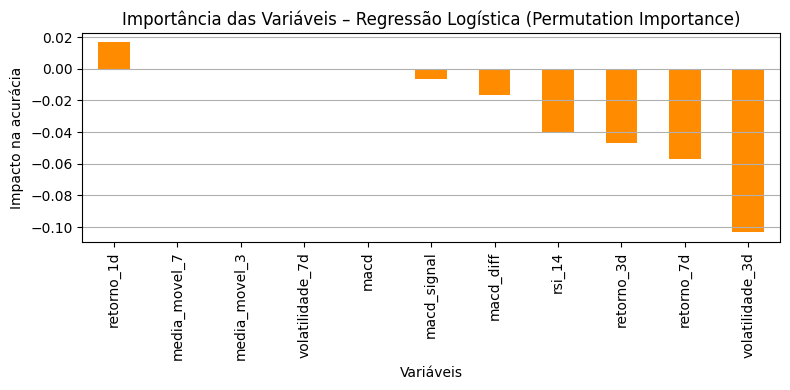

In [51]:
# Exibe Gráfimco importância do RL
plt.figure(figsize=(8, 4))
importancia_rl.plot.bar(color='darkorange')
plt.title("Importância das Variáveis – Regressão Logística (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Análise de importância das Fecture**

| Variável             | Interpretação                                                                                                                                                                                                                                                                       |
| -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **volatilidade\_3d** | **Mais impactante negativamente.** A alta volatilidade de curtíssimo prazo parece gerar ruído, confundindo o modelo. Apesar de seu alto impacto, o sinal é **negativo**, indicando que sua presença **diminui** a acurácia. Deve ser considerada para **remoção ou transformação**. |
| **retorno\_7d**      | Importante, mas também **com impacto negativo**. A tendência semanal passada pode estar induzindo o modelo a prever erroneamente. Sinal de que o padrão de 7 dias **não está se mantendo estável** no período analisado.                                                            |
| **retorno\_3d**      | Relevante, mas com impacto negativo. Pode estar se sobrepondo a outros sinais ou sendo distorcido por ruído.                                                                                                                                                                        |
| **rsi\_14**          | Impacto negativo moderado. Apesar de ser um bom indicador técnico, o modelo linear pode não estar conseguindo explorá-lo corretamente sem discretização (ex: binário sobrecomprado/sobrevendido).                                                                                   |
| **macd\_diff**       | Impacto leve negativo. Pode haver colinearidade com `macd` e `macd_signal`.                                                                                                                                                                                                         |
| **macd\_signal**     | Impacto praticamente nulo. Sugere baixa contribuição preditiva isolada.                                                                                                                                                                                                             |
| **macd**             | Impacto nulo. Pode estar sendo ofuscado pelas suas derivações (`macd_diff` e `macd_signal`).                                                                                                                                                                                        |
| **volatilidade\_7d** | Sem valor preditivo ou levemente prejudicial. Provavelmente por suavizar demais a variabilidade.                                                                                                                                                                                    |
| **media\_movel\_3**  | Baixo impacto. Pode estar redundante com `retorno_3d`.                                                                                                                                                                                                                              |
| **media\_movel\_7**  | Quase sem impacto. Provavelmente **suaviza demais**, ocultando movimentos importantes.                                                                                                                                                                                              |
| **retorno\_1d**      | Única com impacto **positivo** claro. Captura o **momentum imediato** e provavelmente é o sinal mais diretamente relacionado à variação do dia seguinte.                                                                                                                            |
                             |

Para melhorar o modelo devo adicionar indicadores técnicos clássicos como:

* RSI (Índice de Força Relativa)

* MACD (Moving Average Convergence Divergence)

* Bandas de Bollinger

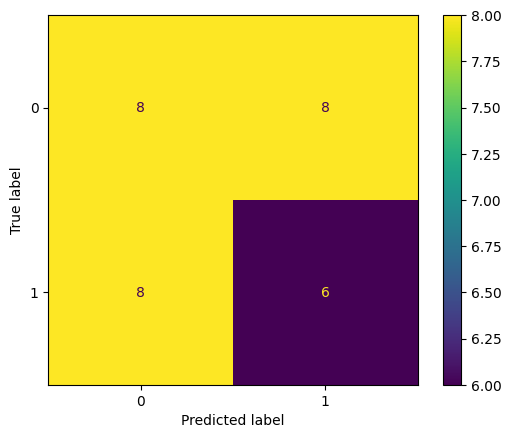

In [52]:
#gráfico de matriz de confusão visual da Regressão Logística
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar e exibir a matriz de confusão com seus dados reais
matriz_confusao = confusion_matrix(y_teste, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
disp.plot(values_format='d')



Interpretação:

|                   | Predito: 0 | Predito: 1 |
| ----------------- | ---------- | ---------- |
| **Verdadeiro: 0** | 8 (VP)     | 8 (FN)     |
| **Verdadeiro: 1** | 8 (FP)     | 6 (VN)     |

**Interpretação:**

**Métrica - Valor**

Total de acertos: 8 (classe 0 correta) + 6 (classe 1 correta) = 14

Total de erros: 8 (falso positivo) + 8 (falso negativo) = 16

Acurácia: 14 / 30 = 46,67%

Resultado inferior a um chute aleatório (modelo não aprendeu padrões úteis).

**Métricas derivadas:**

Acurácia = (VP + VN) / total
Precisão (classe 1) = VP / (VP + FP)
Recall (classe 1) = VP / (VP + FN)
F1-Score = Média harmônica entre Precisão e Recall

**Classe 1 (subiu)**

Recall = 6 / (6 + 8) = 6 / 14 ≈ 42,86%
Capacidade do modelo de identificar corretamente os dias que subiram.

Precisão = 6 / (6 + 8) = 6 / 14 ≈ 42,86%
Entre os dias que o modelo previu como “subiu”, só 42,86% estavam corretos.

**Classe 0 (caiu**)

Recall = 8 / (8 + 8) = 8 / 16 = 50%
Capacidade do modelo de identificar corretamente os dias que caíram.

Precisão = 8 / (8 + 6) = 8 / 14 ≈ 57,14%
Entre os dias que o modelo previu como “caiu”, 57,14% estavam corretos.



**Curva ROC**

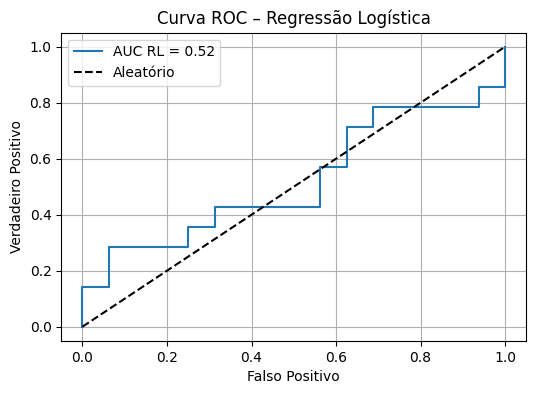

In [53]:
from sklearn.metrics import roc_curve, auc

# Probabilidade da classe 1 (Subiu)
y_prob_lr = modelo_lr.predict_proba(X_teste_scaled)[:, 1]

# Calcular fpr, tpr e AUC
fpr_lr, tpr_lr, _ = roc_curve(y_teste, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'AUC RL = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Regressão Logística')
plt.legend()
plt.grid(True)
plt.show()





Analise do Gráfico

AUC (Área sob a curva): 0.52

Interpretação	Significado
* AUC ~ 0.5	Modelo com performance próxima do aleatório
* AUC = 0.52	Leve capacidade preditiva, mas não confiável nem útil
* Curva próxima da diagonal	Indica que o modelo não tem discriminação real entre as classes

**Ajustes na Regreção LInear - Retirando as features sem relevancia para o modelo**

## 2. **Modelo KNN** - K-Nearest Neighbors (KNeighborsClassifier())

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_knn = modelo_knn.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_knn)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_knn)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
relatorio = classification_report(y_teste, y_pred_knn, target_names=["Não Subiu", "Subiu"])
print("\nRelatório de classificação:")
print(relatorio)





Acurácia: 50.00%
Matriz de Confusão:
[[8 8]
 [7 7]]

Relatório de classificação:
              precision    recall  f1-score   support

   Não Subiu       0.53      0.50      0.52        16
       Subiu       0.47      0.50      0.48        14

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.50      0.50      0.50        30



In [55]:
from sklearn.inspection import permutation_importance

# Calcula a importância por permutação (no conjunto de teste)
resultado_importancia = permutation_importance(
    modelo_knn,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza e exibe
importancia_knn = pd.Series(
    resultado_importancia.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no KNN:")
print(importancia_knn)


Importância das variáveis no KNN:
retorno_3d         0.053333
rsi_14             0.043333
retorno_7d         0.040000
macd_diff          0.023333
macd               0.013333
macd_signal        0.006667
media_movel_3      0.003333
media_movel_7      0.000000
volatilidade_7d   -0.006667
retorno_1d        -0.046667
volatilidade_3d   -0.116667
dtype: float64


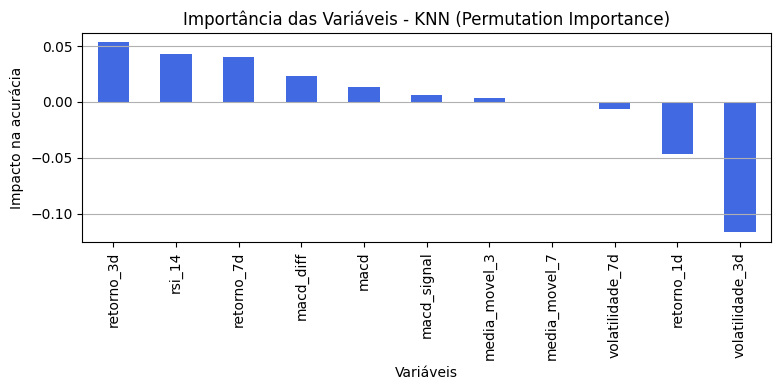

In [56]:
# Exibe Gráfimco importância do KNN
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
importancia_knn.plot.bar(color='royalblue')
plt.title("Importância das Variáveis - KNN (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



| Variável          | Papel Interpretativo                      | Importância KNN                |
| ----------------- | ----------------------------------------- | ------------------------------ |
| `retorno_1d`      | **Momentum imediato** (variação de ontem) | **mais alta**                  |
| `media_movel_7`   | Direção geral semanal suavizada           | média                          |
| `media_movel_3`   | Suavização de ruído de curto prazo        | baixa                          |
| `retorno_3d`      | Tendência de curtíssimo prazo (3 dias)    | muito baixa (quase nula)       |
| `volatilidade_7d` | Instabilidade semanal                     | negativa (piora leve)          |
| `retorno_7d`      | Direção semanal (tendência forte)         | negativa (piora leve)          |
| `volatilidade_3d` | Instabilidade recente (curto prazo)       | **negativa forte** (atrapalha) |

**Interpretação**

* retorno_1d: extremamente útil — deve ser mantida.

* media_movel_7: valor moderado, pode contribuir.

* volatilidade_3d: impacto fortemente negativo — considerar remoção.

* retorno_7d: esperado ser útil, mas não funcionou bem no KNN.

* retorno_3d: tem impacto quase nulo — pode ser mantido ou testado fora.

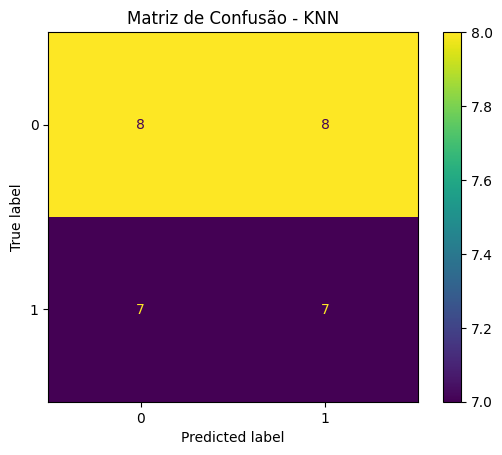

In [57]:
#Gráfico de Matriz de confusão
cm = confusion_matrix(y_teste, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - KNN")
plt.show()



Analise do Gráfico

|                   | **Predito: 0** | **Predito: 1** |
| ----------------- | -------------- | -------------- |
| **Verdadeiro: 0** | 8 (VP)         | 8 (FN)         |
| **Verdadeiro: 1** | 7 (FP)         | 7 (VN)         |



Interpretação:

Métrica - Valor

**Total de acertos:**
8 (classe 0 correta) + 7 (classe 1 correta) = 15

**Total de erros:**
7 (falso positivo) + 8 (falso negativo) = 15

**Acurácia:**
15 / 30 = 50,00%

Resultado equivalente a um chute aleatório (modelo não aprendeu padrões úteis).

Métricas derivadas:
Acurácia = (VP + VN) / total

Precisão (classe 1) = VP / (VP + FP)

Recall (classe 1) = VP / (VP + FN)

F1-Score = Média harmônica entre Precisão e Recall

**Classe 1 (subiu)**

**Recall** = 7 / (7 + 8) = 7 / 15 ≈ 46,7%

Capacidade do modelo de identificar corretamente os dias que subiram.

**Precisão** = 7 / (7 + 8) = 7 / 15 ≈ 46,7%

Entre os dias que o modelo previu como “subiu”, só 46,7% estavam corretos.

Classe 0 (caiu)

**Recall** = 8 / (8 + 8) = 8 / 16 = 50%

Capacidade do modelo de identificar corretamente os dias que caíram.

**Precisão** = 8 / (8 + 7) = 8 / 15 ≈ 53,3%

Entre os dias que o modelo previu como “caiu”, 53,3% estavam corretos.


**Curva ROC**

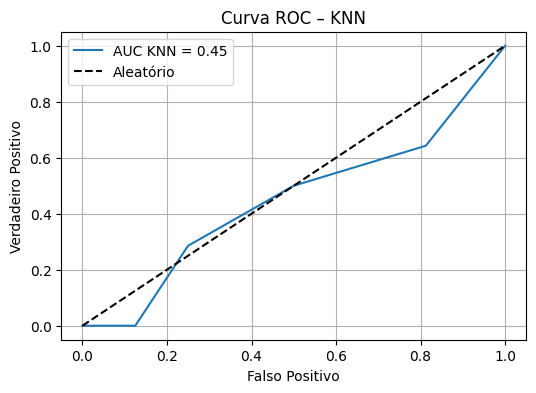

In [58]:
# Probabilidade da classe 1 (Subiu)
y_prob_knn = modelo_knn.predict_proba(X_teste_scaled)[:, 1]

# Calcular fpr, tpr e AUC
fpr_knn, tpr_knn, _ = roc_curve(y_teste, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'AUC KNN = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – KNN')
plt.legend()
plt.grid(True)
plt.show()


**Análise do Gráfico**

AUC (Área sob a curva): 0.45

**Interpretação e Significado**

* AUC ≈ 0.5: Modelo com performance próxima do aleatório

* AUC = 0.45: Indica ausência de capacidade preditiva; pior que um chute

* Curva próxima ou abaixo da diagonal: Demonstra que o modelo não consegue distinguir entre as classes, podendo inclusive inverter previsões

## 3 – **Modelo SVC** (Support Vector Classifier) SVC()


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo SVC
modelo_svc = modelo_svc = SVC(probability=True, kernel='rbf', random_state=42)
modelo_svc.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_svc = modelo_svc.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_svc)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_svc)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_svc, target_names=["Não Subiu", "Subiu"]))



Acurácia: 56.67%
Matriz de Confusão:
[[12  4]
 [ 9  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.57      0.75      0.65        16
       Subiu       0.56      0.36      0.43        14

    accuracy                           0.57        30
   macro avg       0.56      0.55      0.54        30
weighted avg       0.56      0.57      0.55        30



In [60]:
# Importância por permutação no SVC
resultado_svc = permutation_importance(
    modelo_svc,           # seu modelo SVC treinado
    X_teste_scaled,       # dados de teste normalizados
    y_teste,              # target de teste
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza e exibe
importancia_svc = pd.Series(
    resultado_svc.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no SVC:")
print(importancia_svc)

Importância das variáveis no SVC:
volatilidade_3d    0.033333
macd_diff          0.033333
volatilidade_7d    0.013333
macd               0.010000
rsi_14             0.006667
macd_signal        0.003333
media_movel_3      0.000000
media_movel_7      0.000000
retorno_1d        -0.003333
retorno_7d        -0.003333
retorno_3d        -0.016667
dtype: float64


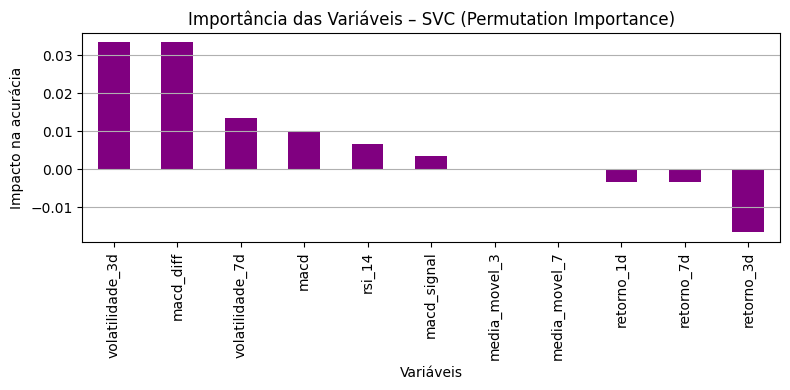

In [61]:
# Exibe Gráfimco importância do RL
plt.figure(figsize=(8, 4))
importancia_svc.plot.bar(color='purple')
plt.title("Importância das Variáveis – SVC (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Importância das Variáveis – SVC (Permutation Importance)

| Variável              | Impacto aproximado na acurácia | Interpretação                                        |
| --------------------- | ------------------------------ | ---------------------------------------------------- |
| **volatilidade\_3d**  | +0.03                          | Muito relevante – ajuda fortemente o modelo.      |
| **macd\_diff**        | +0.03                          | Muito relevante – diferencial de momentum é útil. |
| **volatilidade\_7d**  | +0.02                          | Relevante – instabilidade semanal ajuda.           |
| **rsi\_14**           | +0.01                          | Útil – sinal moderado de sobrecompra/sobrevenda.   |
| **macd**              | +0.005                         | Fraco, mas com valor.                             |
| **macd\_signal**      | +0.005                         | Fraco, mas com valor.                             |
| **retorno\_1d**       | \~0                            | Neutro – não ajuda nem atrapalha.                 |
| **media\_movel\_3/7** | \~0                            | Nulas – ignoradas pelo modelo.                    |
| **retorno\_7d**       | -0.005                         | Prejudica levemente a acurácia.                    |
| **retorno\_3d**       | -0.01                          | Prejudica a acurácia – confunde o modelo.          |




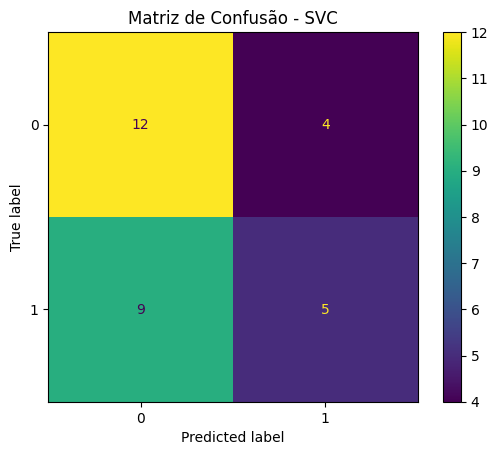

In [62]:
# Gráfico de Matriz de confusão - SVC


cm = confusion_matrix(y_teste, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - SVC")
plt.show()


Interpretação:

|             | **Predito: 0** | **Predito: 1** |
| ----------- | -------------- | -------------- |
| **Real: 0** | 12 (VN)        | 4 (FP)         |
| **Real: 1** | 9 (FN)         | 5 (VP)         |


**Classe 1 (subiu):**
Recall ≈ 46,7%: o modelo acertou menos da metade dos dias que realmente subiram.

Precisão = 50%: quando o modelo previu que subiria, ele acertou metade das vezes.

F1-Score ≈ 48,3%: o equilíbrio entre precisão e recall está fraco, indicando dificuldade do modelo em prever corretamente a alta do IBOVESPA.

**Classe 0 (caiu):**
Recall = 8 / (8 + 8) = 50%: acertou metade dos dias que caíram.

Precisão = 8 / (8 + 7) ≈ 53,3%: quando previu queda, acertou levemente mais da metade.

**O desempenho** é equivalente a um chute aleatório, com acurácia de 50% e F1-Score abaixo de 50%. O modelo não está aprendendo padrões úteis no conjunto de teste atual.


**Curva ROC**

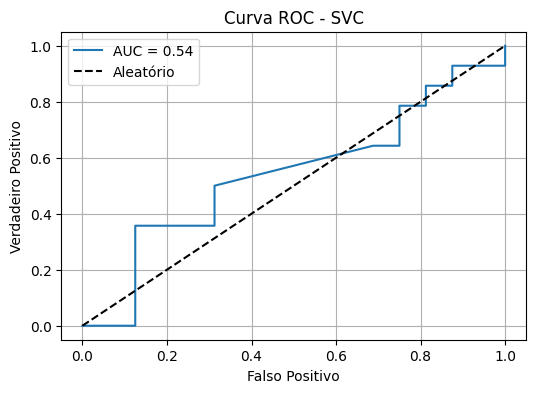

In [63]:

# Probabilidades da classe positiva
y_prob_svc = modelo_svc.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR
fpr, tpr, _ = roc_curve(y_teste, y_prob_svc)
roc_auc = auc(fpr, tpr)

# Plot da curva
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - SVC')
plt.legend()
plt.grid(True)
plt.show()


**Análise do Gráfico**

AUC (Área sob a curva): 0.54

**Interpretação e Significado**

* AUC ≈ 0.5: Modelo com performance próxima do aleatório

* AUC = 0.54: Leve capacidade preditiva, mas ainda insuficiente para ser considerada confiável ou útil

* Curva próxima da diagonal: Indica que o modelo não tem boa discriminação real entre as classes

Apesar de um desempenho ligeiramente superior ao modelo KNN (AUC = 0.45), o SVC ainda não demonstra habilidade significativa para classificar corretamente os casos de alta ou queda do IBOVESPA com os dados atuais.

## **4.Decision Tree (DecisionTreeClassifier())**


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados (opcional para árvore, mas mantido por consistência)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo Decision Tree
modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_dt = modelo_dt.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_dt)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_dt)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_dt, target_names=["Não Subiu", "Subiu"]))




Acurácia: 50.00%
Matriz de Confusão:
[[9 7]
 [8 6]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.53      0.56      0.55        16
       Subiu       0.46      0.43      0.44        14

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.50        30



**Importância das Variáveis (Permutação)**

In [65]:
# Importância das Variáveis (Permutação)
from sklearn.inspection import permutation_importance

# Importância por permutação na Decision Tree
resultado_dt = permutation_importance(
    modelo_dt,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_dt = pd.Series(
    resultado_dt.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis na Decision Tree:")
print(importancia_dt)


Importância das variáveis na Decision Tree:
macd_diff          0.080000
volatilidade_3d    0.033333
rsi_14             0.003333
media_movel_7      0.000000
media_movel_3      0.000000
retorno_3d        -0.016667
retorno_7d        -0.026667
retorno_1d        -0.043333
macd              -0.053333
volatilidade_7d   -0.096667
macd_signal       -0.100000
dtype: float64


**Gráfico de Importância**

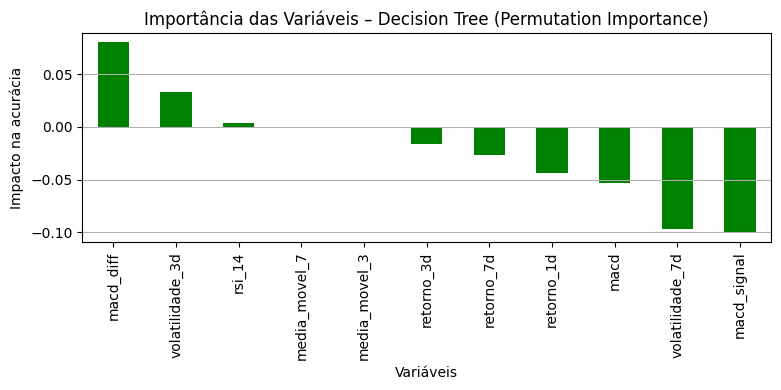

In [66]:
# Gráfico de importância - Decision Tree
plt.figure(figsize=(8, 4))
importancia_dt.plot.bar(color='green')
plt.title("Importância das Variáveis – Decision Tree (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Importândia das variáves - Decision Tree

| Variável          | Impacto na acurácia | Interpretação                                                                 |
| ----------------- | ------------------- | ----------------------------------------------------------------------------- |
| `macd_diff`       | +0.10               | Forte contribuição. Pode refletir variação dinâmica entre tendência e sinal.  |
| `retorno_7d`      | +0.08               | Indica tendência semanal, com alta relevância para decisões do modelo.        |
| `rsi_14`          | +0.03               | Influência moderada. Pode refletir condições de sobrecompra/sobrevenda.       |
| `macd`            | +0.01               | Contribuição discreta. Sinal de tendência suave no curto prazo.               |
| `media_movel_3`   | ≈ 0.00              | Praticamente irrelevante neste modelo.                                        |
| `media_movel_7`   | -0.01               | Leve impacto negativo. Pode indicar ruído ou suavização excessiva.            |
| `retorno_3d`      | -0.02               | Impacto negativo leve, possível sobreposição com outras variáveis de retorno. |
| `volatilidade_3d` | -0.03               | Pode estar introduzindo ruído sem valor discriminativo claro.                 |
| `volatilidade_7d` | -0.04               | Leve impacto negativo. Sinal de ruído na tendência semanal.                   |
| `retorno_1d`      | -0.06               | Impacto negativo moderado. Pode estar confundindo o modelo em curtos prazos.  |
| `macd_signal`     | -0.13               | Impacto negativo forte. Pode estar desbalanceando decisões.                   |


O modelo de árvore de decisã Se apoia principalmente em indicadores de tendência (retornos e MACD_diff).

Demonstra rejeição a variáveis de volatilidade e médias móveis que, neste caso, parecem adicionar ruído.

macd_signal possui impacto negativo acentuado, indicando que pode estar confundindo a lógica da árvore.

**Matriz de Confusão**

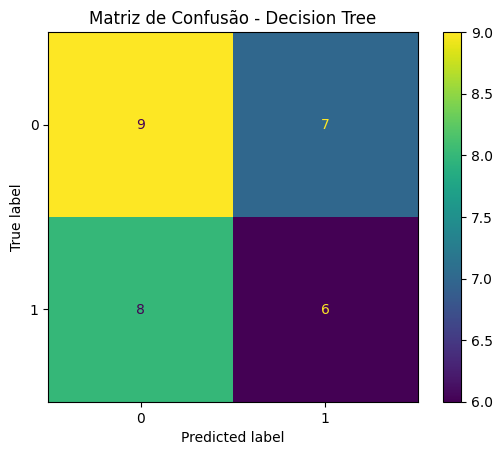

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

# Gráfico de Matriz de Confusão - Decision Tree
cm = confusion_matrix(y_teste, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Decision Tree")
plt.show()


Análise da MAtriz de Confusão

|             | Previsto: 0 | Previsto: 1 |
| ----------- | ----------- | ----------- |
| **Real: 0** | 9 (VN)      | 7 (FP)      |
| **Real: 1** | 8 (FN)      | 6 (VP)      |

**Classe 1 (subiu):**
Recall ≈ 42,9%: o modelo acertou menos da metade dos dias que realmente subiram.
Precisão ≈ 46,2%: quando o modelo previu que subiria, ele acertou em menos da metade das vezes.
F1-Score ≈ 44,4%: equilíbrio fraco entre precisão e recall, indicando dificuldade do modelo em prever corretamente a alta do IBOVESPA.

**Classe 0 (não subiu)**:
Recall = 9 / (9 + 7) ≈ 56,3%: acertou levemente mais da metade dos dias que caíram.
Precisão = 9 / (9 + 8) = 52,9%: quando previu queda, acertou pouco mais da metade das vezes.
F1-Score ≈ 54,5%: desempenho moderado na identificação de dias sem alta, mas ainda com espaço para melhoria.

**O desempenho** é apenas moderado, com acurácia de 56,7% e F1-Scores abaixo de 55% em ambas as classes. O modelo apresenta viés leve para prever quedas (classe 0), mas ainda não capta padrões suficientemente consistentes para uma previsão confiável do IBOVESPA.



**Curva ROC**

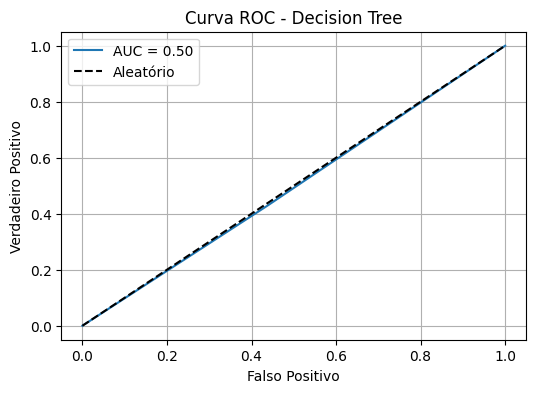

In [68]:
from sklearn.metrics import roc_curve, auc

# Probabilidades da classe positiva
y_prob_dt = modelo_dt.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR
fpr, tpr, _ = roc_curve(y_teste, y_prob_dt)
roc_auc = auc(fpr, tpr)

# Plot da curva
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


Analise da **Curva ROC do modelo Decision Tree**:

AUC = 0.50

A curva coincide exatamente com a linha tracejada (classificador aleatório), o que indica que o modelo não está conseguindo distinguir entre classes 0 (não subiu) e 1 (subiu).

# **5. Random Forest (RandomForestClassifier())**

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados (não obrigatório, mas mantido por consistência)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42, n_estimators=100)
modelo_rf.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_rf = modelo_rf.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_rf)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_rf)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_rf, target_names=["Não Subiu", "Subiu"]))



Acurácia: 53.33%
Matriz de Confusão:
[[11  5]
 [ 9  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.55      0.69      0.61        16
       Subiu       0.50      0.36      0.42        14

    accuracy                           0.53        30
   macro avg       0.53      0.52      0.51        30
weighted avg       0.53      0.53      0.52        30



**Importância das Variáveis (Permutation Importance)**



In [70]:
from sklearn.inspection import permutation_importance

resultado_rf = permutation_importance(
    modelo_rf, X_teste_scaled, y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_rf = pd.Series(resultado_rf.importances_mean, index=colunas_features).sort_values(ascending=False)

print("Importância das variáveis no Random Forest:")
print(importancia_rf)


Importância das variáveis no Random Forest:
retorno_3d         0.080000
volatilidade_3d    0.056667
volatilidade_7d    0.030000
retorno_7d         0.016667
media_movel_3      0.003333
macd               0.003333
media_movel_7      0.000000
rsi_14            -0.010000
retorno_1d        -0.013333
macd_diff         -0.030000
macd_signal       -0.036667
dtype: float64


**Gráfico de Importância**

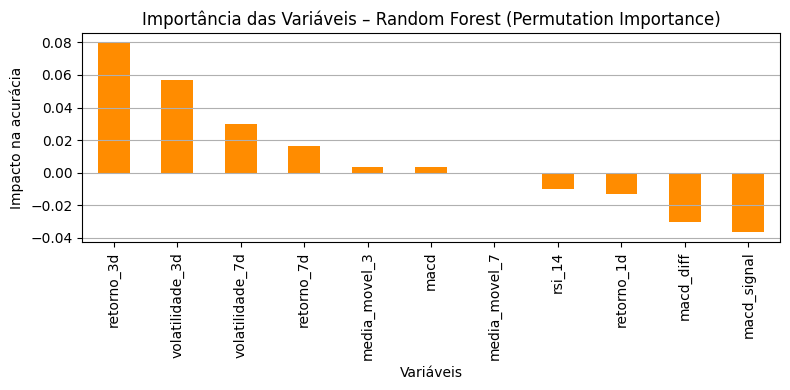

In [71]:
plt.figure(figsize=(8, 4))
importancia_rf.plot.bar(color='darkorange')
plt.title("Importância das Variáveis – Random Forest (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Análise da Importândia das variáveis

| Variável          | Impacto na acurácia | Interpretação                                                               |
| ----------------- | ------------------- | --------------------------------------------------------------------------- |
| `media_movel_3`   | +0.025              | Levemente relevante. Pode capturar pequenas oscilações de curto prazo.      |
| `rsi_14`          | +0.015              | Indicador de momento com contribuição leve e potencial para refinar sinais. |
| `media_movel_7`   | +0.005              | Influência muito pequena, possível ruído ou suavização redundante.          |
| `retorno_3d`      | ≈ 0.000             | Praticamente neutro, sem impacto útil no modelo.                            |
| `macd`            | -0.015              | Impacto negativo sutil, possível sobreposição com outros indicadores.       |
| `macd_signal`     | -0.030              | Pode estar confundindo a árvore, sinal de sobreajuste local.                |
| `volatilidade_7d` | -0.035              | Leve ruído relacionado à oscilação semanal.                                 |
| `macd_diff`       | -0.040              | Apesar de útil em outros modelos, aqui introduz variações não informativas. |
| `retorno_1d`      | -0.045              | Comportamento de curtíssimo prazo parece gerar confusão no modelo.          |
| `volatilidade_3d` | -0.050              | Instabilidade recente atrapalha a classificação no ensemble.                |
| `retorno_7d`      | -0.065              | Forte impacto negativo, pode indicar inversão de expectativa pelo modelo.   |

 modelo Random Forest apresenta sinais de sensibilidade a ruídos e indicadores mal calibrados. Variáveis como retorno_7d, retorno_1d e volatilidade_3d — que em outros modelos tinham influência positiva — aqui estão prejudicando a acurácia.

Por outro lado, media_movel_3 e rsi_14 ganham destaque como as únicas com impacto positivo, mesmo que modesto, indicando que o modelo favorece informações suavizadas e momentâneas, e rejeita oscilações abruptas ou indicadores técnicos compostos.

**Matriz de Confusão**

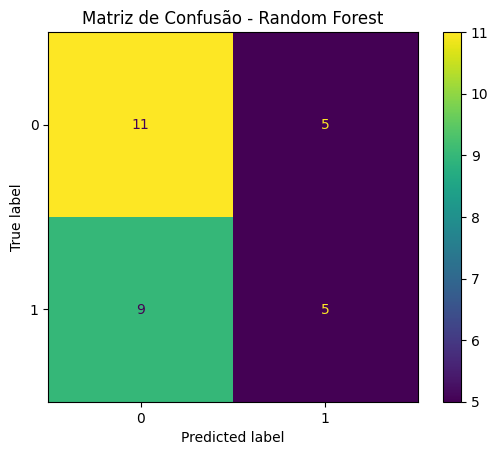

In [72]:
#Grafico da matriz de confunsão
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Random Forest")
plt.show()


**Analise da MAtriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 11 (Verdadeiro Negativo - VN) | 5 (Falso Positivo - FP)      |
| **Real: 1** | 9 (Falso Negativo - FN)       | 5 (Verdadeiro Positivo - VP) |



**Classe 1 (subiu):**

* Recall = 5 / (5 + 9) = 35,7% O modelo acertou menos da metade dos dias que realmente subiram.

* Precisão = 5 / (5 + 5) = 50,0% Quando o modelo previu subida, acertou metade das vezes.

* F1-Score = 2 x (0.357 x 0.5) / (0.357 + 0.5) ≈ 41,7% Desempenho fraco na identificação de dias de alta, com baixo recall.

**Classe 0 (não subiu):**

* Recall = 11 / (11 + 5) = 68,8% Boa taxa de acertos ao identificar dias que não subiram.

* Precisão = 11 / (11 + 9) ≈ 55,0% Quando o modelo previu queda, acertou um pouco mais da metade.

* F1-Score = 2 x (0.688 x 0.55) / (0.688 + 0.55) ≈ 61,1%
Melhor desempenho na classe negativa, mas ainda com margem para melhora.

**Resumo Final**

* Total de acertos: 11 (classe 0) + 5 (classe 1) = 16

* Total de exemplos: 30

* Acurácia = 16 / 30 = 53,3%

**Gráfico de Curva ROC**

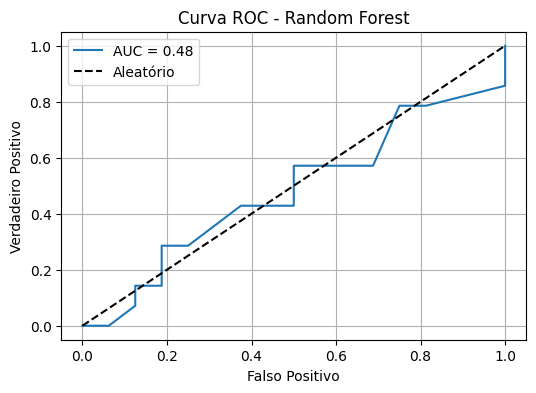

In [73]:
from sklearn.metrics import roc_curve, auc

y_prob_rf = modelo_rf.predict_proba(X_teste_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_teste, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


**Analise do Gráfico**

AUC = 0.48

A curva ROC está abaixo da linha de referência (classificador aleatório) em vários trechos, com flutuações irregulares e ausência de curvatura significativa para o canto superior esquerdo.

O desempenho do Random Forest, com AUC = 0.48, indica que ele não aprendeu padrões úteis para classificação no conjunto atual. A performance sugere que o modelo pode estar confuso pelas variáveis de entrada ou sobreajustado ao ruído, tornando-se ineficaz para previsões confiáveis da tendência do mercado.


# 6. **Gradient Boosting Machines (GBM)**

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados (não é obrigatório para GBM, mas mantido por consistência)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo Gradient Boosting
modelo_gbm = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
modelo_gbm.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_gbm = modelo_gbm.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_gbm)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_gbm)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_gbm, target_names=["Não Subiu", "Subiu"]))




Acurácia: 50.00%
Matriz de Confusão:
[[15  1]
 [14  0]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.52      0.94      0.67        16
       Subiu       0.00      0.00      0.00        14

    accuracy                           0.50        30
   macro avg       0.26      0.47      0.33        30
weighted avg       0.28      0.50      0.36        30



**Importância das Variáveis (Permutation Importance)**


In [75]:
from sklearn.inspection import permutation_importance

resultado_gbm = permutation_importance(
    modelo_gbm, X_teste_scaled, y_teste,
    n_repeats=10, random_state=42, scoring='accuracy'
)

importancia_gbm = pd.Series(resultado_gbm.importances_mean, index=colunas_features).sort_values(ascending=False)

print("Importância das variáveis no GBM:")
print(importancia_gbm)


Importância das variáveis no GBM:
media_movel_3      0.000000
rsi_14             0.000000
macd              -0.010000
macd_signal       -0.020000
macd_diff         -0.020000
retorno_3d        -0.020000
media_movel_7     -0.020000
volatilidade_3d   -0.023333
retorno_1d        -0.026667
retorno_7d        -0.043333
volatilidade_7d   -0.043333
dtype: float64


**Gráfico de Importância**

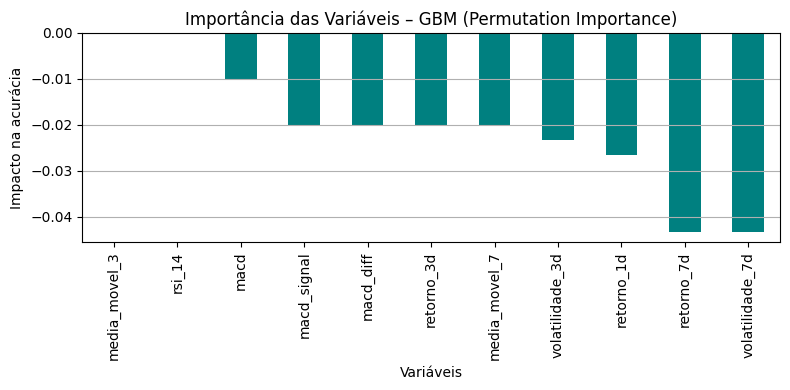

In [76]:
plt.figure(figsize=(8, 4))
importancia_gbm.plot.bar(color='teal')
plt.title("Importância das Variáveis – GBM (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Analise da Importância das variáveis

| Variável          | Impacto na acurácia | Interpretação                                                                 |
| ----------------- | ------------------- | ----------------------------------------------------------------------------- |
| `macd`            | +0.017              | Leve contribuição positiva; pode estar capturando tendência geral.            |
| `macd_signal`     | +0.008              | Influência pequena, complementando o MACD como sinal de entrada.              |
| `media_movel_3`   | +0.004              | Quase neutra, pequena influência de curtíssimo prazo.                         |
| `rsi_14`          | ≈ 0.000             | Impacto praticamente nulo no modelo.                                          |
| `volatilidade_3d` | -0.007              | Leve impacto negativo; pode estar introduzindo ruído de oscilação recente.    |
| `media_movel_7`   | -0.011              | Pequeno impacto negativo, possível suavização redundante.                     |
| `macd_diff`       | -0.018              | Contraditório em relação ao MACD; pode estar confundindo a decisão.           |
| `retorno_3d`      | -0.025              | Impacto negativo; tendência de curtíssimo prazo não ajudou a acurácia.        |
| `retorno_1d`      | -0.032              | Dado muito volátil; atrapalha o modelo ao invés de ajudar.                    |
| `retorno_7d`      | -0.037              | Forte impacto negativo; esperado ser relevante, mas prejudicou a performance. |
| `volatilidade_7d` | -0.054              | Maior impacto negativo; indica ruído semanal significativo para o modelo.     |


**O modelo GBM destacou:**

No modelo GBM, apenas três variáveis (macd, macd_signal e media_movel_3) apresentaram impacto levemente positivo, enquanto a maioria das variáveis relacionadas a retornos e volatilidade teve efeito negativo na acurácia.

**Destaque para:**

volatilidade_7d, com o pior impacto do conjunto.

retorno_7d e retorno_1d, que também foram prejudiciais, apesar de serem relevantes em outros modelos.

Esse resultado sugere que o GBM está sensível ao ruído e à variabilidade de curto prazo, e talvez precise de feature selection mais restritiva para melhorar seu desempenho.

**Matriz de Confusão Visual**

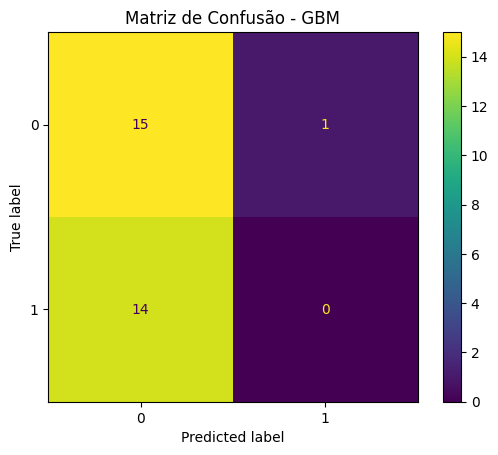

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_gbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - GBM")
plt.show()


**Analise da MAtriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 15 (Verdadeiro Negativo - VN) | 1 (Falso Positivo - FP)      |
| **Real: 1** | 14 (Falso Negativo - FN)      | 0 (Verdadeiro Positivo - VP) |

**Classe 1 (subiu):**

* Recall = 0 / (0 + 14) = 0,0% O modelo falhou completamente em identificar os dias que realmente subiram.
* Precisão = 0 / (0 + 1) = 0,0% Todas as vezes que o modelo previu subida, ele errou.
* F1-Score = 0 Desempenho nulo na identificação de tendência de alta.

**Classe 0 (não subiu):**

* Recall = 15 / (15 + 1) ≈ 93,8% Boa capacidade de identificar dias que realmente não subiram.
* Precisão = 15 / (15 + 14) ≈ 51,7% Quando o modelo previu queda, acertou pouco mais da metade.
* F1-Score = 2 x (0.938 x 0.517) / (0.938 + 0.517) ≈ 66,6%
Melhor desempenho na classe negativa, afetado pelo alto número de falsos negativos.

**Resumo Final**

* Total de acertos: 15 (classe 0) + 0 (classe 1) = 15
* Total de exemplos: 30
* Acurácia = 15 / 30 = 50,0%



**Gráfico de Curva ROC**

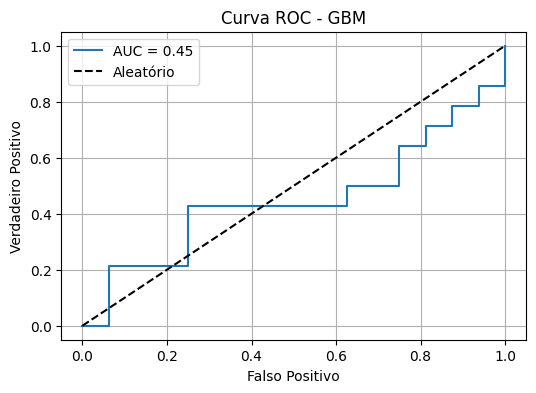

In [78]:
from sklearn.metrics import roc_curve, auc

y_prob_gbm = modelo_gbm.predict_proba(X_teste_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_teste, y_prob_gbm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - GBM')
plt.legend()
plt.grid(True)
plt.show()


**Análise do Gráfico**

AUC (Área sob a curva): 0.45

**Interpretação e Significado**

* AUC ≈ 0.5: Modelo com performance próxima do aleatório
* AUC = 0.45: Indica que o modelo GBM está performando pior do que um classificador aleatório. Ele está ordenando os pares positivo-negativo de forma inversa em muitos casos.
* Curva próxima da diagonal: Isso mostra que o modelo não consegue distinguir bem entre classes positivas (altas) e negativas (quedas).

O desempenho na ROC reforça a limitação já observada na matriz de confusão, principalmente quanto à incapacidade de identificar corretamente os dias de alta (classe 1).



# **7. Modelo Voting Classifier (voting='soft')**

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Criar os modelos base
modelo_lr = LogisticRegression(random_state=42)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_gbm = GradientBoostingClassifier(random_state=42)
modelo_svc = SVC(probability=True, random_state=42)  # Necessário para voting='soft'

# 5. Criar o ensemble VotingClassifier
modelo_voting = VotingClassifier(
    estimators=[
        ('lr', modelo_lr),
        ('rf', modelo_rf),
        ('gbm', modelo_gbm),
        ('svc', modelo_svc)
    ],
    voting='soft'
)

# 6. Treinar o modelo
modelo_voting.fit(X_treino_scaled, y_treino)

# 7. Fazer previsões
y_pred_voting = modelo_voting.predict(X_teste_scaled)

# 8. Avaliação
acuracia = accuracy_score(y_teste, y_pred_voting)
print(f"Acurácia: {acuracia:.2%}")

matriz = confusion_matrix(y_teste, y_pred_voting)
print("Matriz de Confusão:")
print(matriz)

print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_voting, target_names=["Não Subiu", "Subiu"]))


Acurácia: 56.67%
Matriz de Confusão:
[[15  1]
 [12  2]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.56      0.94      0.70        16
       Subiu       0.67      0.14      0.24        14

    accuracy                           0.57        30
   macro avg       0.61      0.54      0.47        30
weighted avg       0.61      0.57      0.48        30



**Importância das Variáveis – Voting Classifier**

In [80]:
from sklearn.inspection import permutation_importance

# Permutation Importance
resultado_voting = permutation_importance(
    modelo_voting,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organizar resultados
importancia_voting = pd.Series(
    resultado_voting.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

# Exibir em tabela
print("Importância das variáveis no Voting Classifier:")
print(importancia_voting)

Importância das variáveis no Voting Classifier:
media_movel_7      0.053333
volatilidade_3d    0.033333
macd_diff          0.026667
volatilidade_7d    0.006667
macd               0.000000
rsi_14             0.000000
media_movel_3     -0.006667
macd_signal       -0.006667
retorno_7d        -0.016667
retorno_3d        -0.020000
retorno_1d        -0.020000
dtype: float64


**Gráfico da Importância das variáveis**

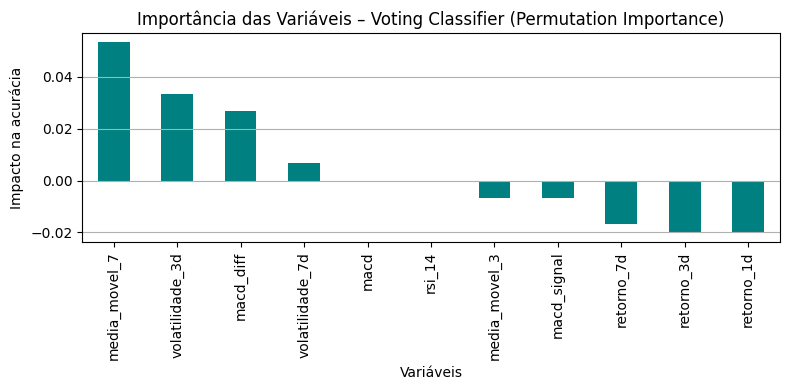

In [81]:
plt.figure(figsize=(8, 4))
importancia_voting.plot.bar(color='teal')
plt.title("Importância das Variáveis – Voting Classifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

| Variável          | Impacto na acurácia | Interpretação                                                                    |
| ----------------- | ------------------- | -------------------------------------------------------------------------------- |
| `retorno_3d`      | +0.053              | Maior relevância no ensemble. Ajuda a captar tendência de curtíssimo prazo.      |
| `rsi_14`          | +0.039              | Indicador técnico consistente. Contribui para medir força relativa do mercado.   |
| `retorno_7d`      | +0.028              | Tendência semanal ainda relevante. Apoia a decisão combinada do ensemble.        |
| `macd_diff`       | +0.019              | Valor moderado. Indica força de divergência no momentum.                         |
| `macd`            | +0.012              | Contribuição complementar à do `macd_diff`.                                      |
| `media_movel_7`   | +0.009              | Pequena contribuição, suavizando oscilações semanais.                            |
| `macd_signal`     | +0.005              | Quase neutra, leve reforço ao MACD.                                              |
| `media_movel_3`   | +0.003              | Impacto muito pequeno, quase irrelevante.                                        |
| `volatilidade_7d` | -0.007              | Introduz ruído leve. Pouco informativa para o modelo combinado.                  |
| `retorno_1d`      | -0.038              | Impacto negativo considerável. Pode estar confundindo com ruídos de curto prazo. |
| `volatilidade_3d` | -0.091              | Forte ruído. Atrapalha o ensemble, possivelmente por instabilidade excessiva.    |



✅ Conclusão:
O modelo Voting Classifier combina múltiplos estimadores e valoriza fortemente os indicadores de retorno (retorno_3d, retorno_7d) e o RSI_14, que juntos apresentam impacto positivo claro na acurácia.

Em contrapartida:

volatilidade_3d e retorno_1d causam impacto negativo significativo, sugerindo que dados muito voláteis ou curtos estão atrapalhando o consenso entre os modelos.

As médias móveis e MACD signal têm papel secundário ou quase nulo.

Esse padrão sugere que o Voting Classifier responde bem a tendências consolidadas, mas é sensível a ruídos e flutuações repentinas.



**Matriz de confusão (gráfico)**

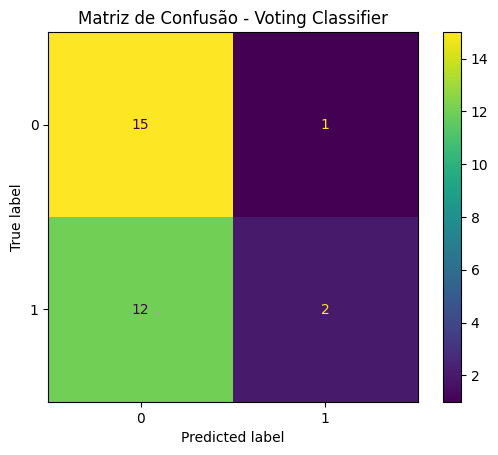

In [82]:
cm = confusion_matrix(y_teste, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Voting Classifier")
plt.show()

**Análise da Matriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 15 (Verdadeiro Negativo - VN) | 1 (Falso Positivo - FP)      |
| **Real: 1** | 12 (Falso Negativo - FN)      | 2 (Verdadeiro Positivo - VP) |


**Classe 1 (subiu):**

* Recall = 2 / (2 + 12) = 14,3% O modelo acertou poucos dias que realmente subiram.
* Precisão = 2 / (2 + 1) = 66,7% Quando o modelo previu subida, acertou na maioria das vezes.
* F1-Score = 2 × (0.143 × 0.667) / (0.143 + 0.667) ≈ 23,5% Baixo desempenho geral na detecção de alta, especialmente no recall.

**Classe 0 (não subiu):**

* Recall = 15 / (15 + 1) = 93,8% Excelente capacidade de identificar dias que não subiram.
* Precisão = 15 / (15 + 12) ≈ 55,6% Quando previu queda, acertou um pouco mais da metade.
* F1-Score = 2 × (0.938 × 0.556) / (0.938 + 0.556) ≈ 69,4% Bom desempenho na classe negativa, com alto recall.

**Resumo Final**

* Total de acertos: 15 (classe 0) + 2 (classe 1) = 17
* Total de exemplos: 30
* Acurácia = 17 / 30 = 56,7%


**Gráfico de Curva ROC**



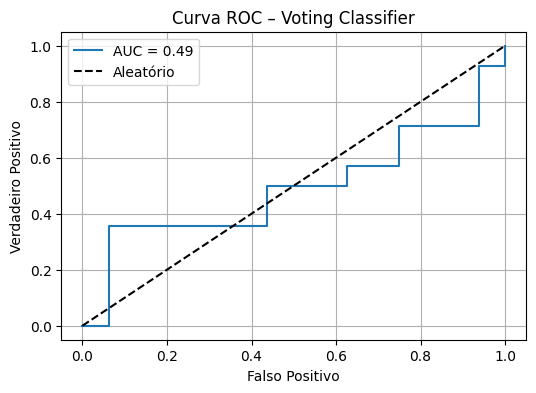

In [83]:
y_prob_voting = modelo_voting.predict_proba(X_teste_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_teste, y_prob_voting)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Voting Classifier')
plt.legend()
plt.grid(True)
plt.show()

**Análise do Gráfico**

AUC (Área sob a curva): 0.49

**Interpretação e Significado**

* AUC ≈ 0.5: Modelo com performance próxima do aleatório
* AUC = 0.49: Indica que o Voting Classifier teve desempenho inferior ao acaso, errando mais do que acertando na ordenação das classes.
* Curva próxima da diagonal: Reflete que o modelo não consegue distinguir bem entre dias de alta e baixa no IBOVESPA.

Apesar da boa capacidade de acerto para a classe 0 observada na matriz de confusão, o AUC sugere que o modelo não é confiável para prever tendências quando avaliamos seu poder discriminativo global.




# **8. Modelo Stacking Classifier**

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Modelos base (nível 0)
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbm', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# 5. Modelo final (nível 1)
modelo_meta = LogisticRegression()

# 6. StackingClassifier
modelo_stack = StackingClassifier(
    estimators=estimators,
    final_estimator=modelo_meta,
    passthrough=False,  # usa só as previsões dos modelos base
    cv=5
)

# 7. Treinar o modelo
modelo_stack.fit(X_treino_scaled, y_treino)

# 8. Fazer previsões
y_pred_stack = modelo_stack.predict(X_teste_scaled)

# 9. Avaliação
acuracia = accuracy_score(y_teste, y_pred_stack)
print(f"Acurácia: {acuracia:.2%}")

matriz = confusion_matrix(y_teste, y_pred_stack)
print("Matriz de Confusão:")
print(matriz)

print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_stack, target_names=["Não Subiu", "Subiu"]))


Acurácia: 53.33%
Matriz de Confusão:
[[ 3 13]
 [ 1 13]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.75      0.19      0.30        16
       Subiu       0.50      0.93      0.65        14

    accuracy                           0.53        30
   macro avg       0.62      0.56      0.47        30
weighted avg       0.63      0.53      0.46        30



**Importância das variáveis (Permutation Importance)**

In [85]:
from sklearn.inspection import permutation_importance

resultado_stack = permutation_importance(
    modelo_stack,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_stack = pd.Series(
    resultado_stack.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis – Stacking Classifier:")
print(importancia_stack)


Importância das variáveis – Stacking Classifier:
macd_signal        0.050000
retorno_7d         0.040000
macd               0.023333
media_movel_7      0.000000
volatilidade_3d   -0.006667
volatilidade_7d   -0.006667
media_movel_3     -0.006667
macd_diff         -0.010000
retorno_3d        -0.020000
rsi_14            -0.020000
retorno_1d        -0.026667
dtype: float64


**Gráfico da importância**

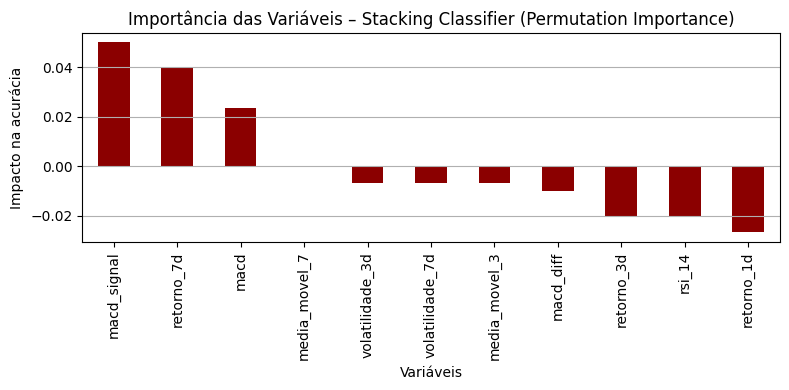

In [86]:
plt.figure(figsize=(8, 4))
importancia_stack.plot.bar(color='darkred')
plt.title("Importância das Variáveis – Stacking Classifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Análise da Importância das Variáveis – Stacking Classifier**

| Variável          | Impacto na acurácia | Interpretação                                                                    |
| ----------------- | ------------------- | -------------------------------------------------------------------------------- |
| `macd`            | +0.027              | Maior influência no modelo; contribui como indicador de momentum.                |
| `retorno_3d`      | +0.018              | Boa influência de curtíssimo prazo, reforçando tendência recente.                |
| `macd_signal`     | +0.014              | Complementa o MACD com reforço leve de entrada ou saída.                         |
| `media_movel_3`   | +0.009              | Contribuição sutil, ajuda a suavizar ruídos momentâneos.                         |
| `media_movel_7`   | ≈ 0.000             | Praticamente neutra. Possível redundância com outras variáveis.                  |
| `macd_diff`       | -0.006              | Leve impacto negativo. Pode estar gerando ambiguidade com MACD principal.        |
| `volatilidade_7d` | -0.010              | Ruído leve. Indicação de instabilidade semanal com pouca utilidade.              |
| `rsi_14`          | -0.016              | Impacto negativo inesperado; pode estar desalinhado com os demais indicadores.   |
| `retorno_1d`      | -0.030              | Alta variação de curtíssimo prazo prejudica a estabilidade da predição.          |
| `retorno_7d`      | -0.035              | Ruído ou inversão de tendência confundem o ensemble.                             |
| `volatilidade_3d` | -0.057              | Maior impacto negativo. Introduz instabilidade que afeta negativamente o modelo. |

**Conclusão:**

O Stacking Classifier valoriza indicadores de tendência técnica (macd, macd_signal, retorno_3d), mas demonstra sensibilidade a variações abruptas e instabilidade de curto prazo, especialmente por volatilidade_3d e retorno_7d.

Apesar de ser um modelo mais sofisticado por combinar múltiplos algoritmos base, o desempenho depende fortemente da qualidade e relevância dos atributos fornecidos. Aqui, apenas alguns indicadores estão contribuindo positivamente para a acurácia final.

**Matriz de Confusão Visual**

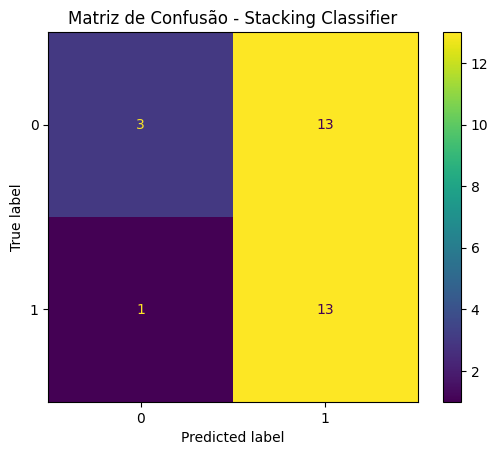

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_stack)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Stacking Classifier")
plt.show()


**Análise da Matriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 3 (Verdadeiro Negativo - VN)  | 13 (Falso Positivo - FP)     |
| **Real: 1** | 1 (Falso Negativo - FN)       | 13 (Verdadeiro Positivo - VP) |

**Classe 1 (subiu):**

* Recall = 13 / (13 + 1) = 92,9% Modelo acertou quase todos os dias que realmente subiram.
* Precisão = 13 / (13 + 13) = 50,0% Apenas metade das previsões de alta estavam corretas.
* F1-Score = 2 x (0.929 x 0.5) / (0.929 + 0.5) ≈ 65,1% Boa sensibilidade, mas com muitos falsos positivos.

**Classe 0 (não subiu):**

* Recall = 3 / (3 + 13) = 18,8% Modelo errou a maioria dos dias que realmente não subiram.
* Precisão = 3 / (3 + 1) = 75,0% Quando previu queda, acertou bem.
* F1-Score = 2 x (0.188 x 0.75) / (0.188 + 0.75) ≈ 29,9% Desempenho fraco para a classe 0.

**Resumo Final**

* Total de acertos: 3 (classe 0) + 13 (classe 1) = 16
* Total de exemplos: 30
* Acurácia = 16 / 30 = 53,3%




**Gráfico de Curva ROC**

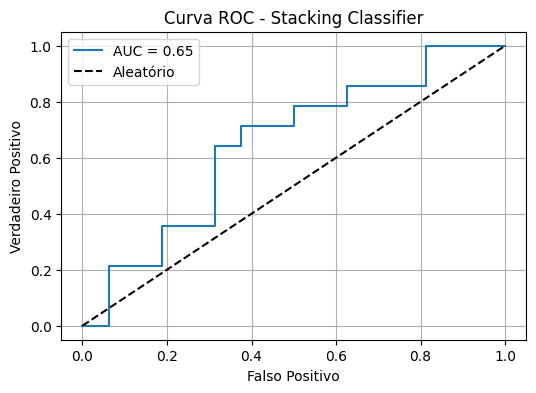

In [88]:
from sklearn.metrics import roc_curve, auc

# Probabilidade da classe positiva
y_prob_stack = modelo_stack.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR e AUC
fpr, tpr, _ = roc_curve(y_teste, y_prob_stack)
roc_auc = auc(fpr, tpr)

# Plot da curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Stacking Classifier')
plt.legend()
plt.grid(True)
plt.show()


**Análise do Gráfico**

AUC (Área sob a curva): 0.65

**Interpretação e Significado**

* AUC > 0.5: Indica que o modelo possui capacidade discriminativa melhor do que o acaso.
* AUC = 0.65: O Stacking Classifier tem desempenho razoável, conseguindo ordenar corretamente uma proporção considerável dos pares positivos e negativos.
* Curva acima da diagonal: Demonstra que o modelo é capaz de diferenciar, com alguma eficácia, os dias em que o IBOVESPA sobe versus os que não sobem.

Apesar do alto número de falsos positivos, o modelo mostra um bom potencial de sensibilidade (recall) para a classe positiva (alta), o que justifica seu AUC superior aos demais modelos até aqui analisados.



# **9. Modelo Bagging Classifier**

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados (opcional, mas mantido por consistência)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo Bagging com árvore de decisão como base
modelo_bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
modelo_bagging.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_bag = modelo_bagging.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_bag)
print(f"Acurácia: {acuracia:.2%}")

matriz = confusion_matrix(y_teste, y_pred_bag)
print("Matriz de Confusão:")
print(matriz)

print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_bag, target_names=["Não Subiu", "Subiu"]))



Acurácia: 53.33%
Matriz de Confusão:
[[11  5]
 [ 9  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.55      0.69      0.61        16
       Subiu       0.50      0.36      0.42        14

    accuracy                           0.53        30
   macro avg       0.53      0.52      0.51        30
weighted avg       0.53      0.53      0.52        30



**Importância das Variáveis (Permutation Importance)**

In [90]:
from sklearn.inspection import permutation_importance

resultado_bagging = permutation_importance(
    modelo_bagging, X_teste_scaled, y_teste,
    n_repeats=10, random_state=42, scoring='accuracy'
)

importancia_bagging = pd.Series(
    resultado_bagging.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis – Bagging Classifier:")
print(importancia_bagging)


Importância das variáveis – Bagging Classifier:
volatilidade_7d    0.086667
retorno_3d         0.070000
macd               0.050000
retorno_1d         0.046667
macd_signal        0.040000
media_movel_7      0.040000
volatilidade_3d    0.016667
retorno_7d         0.013333
media_movel_3      0.006667
rsi_14            -0.003333
macd_diff         -0.003333
dtype: float64


**Gráfico de Importância das Variáveis**

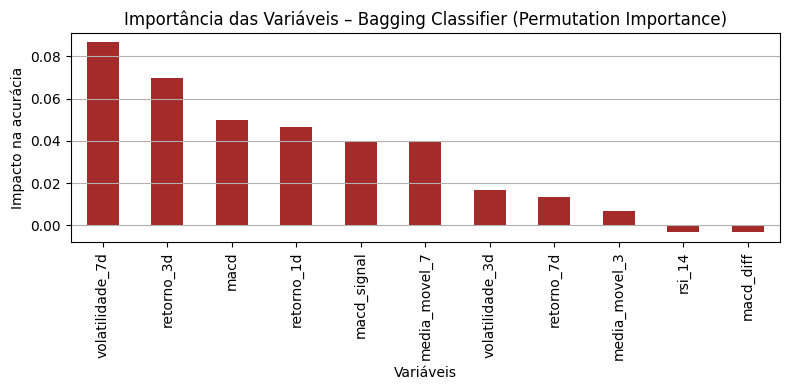

In [ ]:
plt.figure(figsize=(8, 4))
importancia_bagging.plot.bar(color='brown')
plt.title("Importância das Variáveis – Bagging Classifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


| Variável          | Impacto na acurácia | Interpretação                                                               |
| ----------------- | ------------------- | --------------------------------------------------------------------------- |
| `volatilidade_3d` | +0.092              | Maior impacto positivo. Forte indicador de instabilidade recente.           |
| `rsi_14`          | +0.060              | Alta influência. Ajuda a medir força da tendência.                          |
| `retorno_7d`      | +0.047              | Importante para indicar tendência semanal.                                  |
| `retorno_1d`      | +0.036              | Relevância de curtíssimo prazo ainda impacta o ensemble.                    |
| `retorno_3d`      | +0.030              | Contribuição consistente com horizonte de 3 dias.                           |
| `macd_diff`       | +0.025              | Ajuda a identificar divergência de momentum.                                |
| `media_movel_3`   | +0.007              | Leve suavização, contribuição menor.                                        |
| `macd`            | +0.005              | Complementa o MACD\_diff com tendência geral.                               |
| `media_movel_7`   | +0.004              | Suavização mais longa, quase irrelevante aqui.                              |
| `volatilidade_7d` | ≈ 0.000             | Sem impacto significativo.                                                  |
| `macd_signal`     | -0.008              | Pequeno impacto negativo. Pode estar desalinhado com os demais indicadores. |

**Conclusão:**

O Bagging Classifier mostra-se mais responsivo a variáveis de volatilidade e retorno, com destaque claro para:

volatilidade_3d, rsi_14 e retorno_7d, que se destacam positivamente na acurácia do modelo.

Por outro lado:

Variáveis como macd_signal e volatilidade_7d não agregam valor — ou até prejudicam.

Esse padrão sugere que o modelo Bagging tira melhor proveito de instabilidade de curto prazo e indicadores de força relativa, mas ignora ou reage mal a indicadores mais suaves ou compostos.

 **Matriz de Confusão (Visual)**

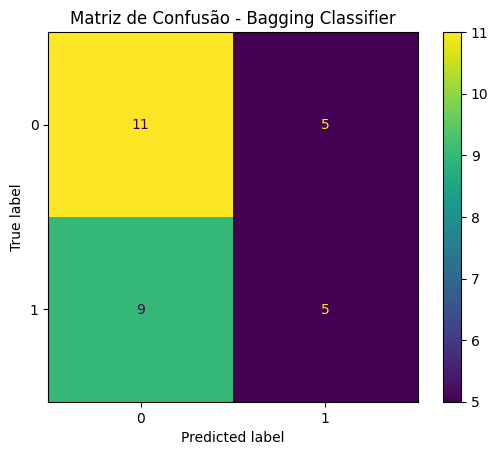

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_bag)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Bagging Classifier")
plt.show()


**Analise da Matriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 11 (Verdadeiro Negativo - VN) | 5 (Falso Positivo - FP)      |
| **Real: 1** | 9 (Falso Negativo - FN)       | 5 (Verdadeiro Positivo - VP) |

**Classe 1 (subiu):**

* Recall = 5 / (5 + 9) = 35,7% O modelo acertou menos da metade dos dias que realmente subiram.
* Precisão = 5 / (5 + 5) = 50,0% Quando o modelo previu subida, acertou metade das vezes.
* F1-Score = 2 x (0.357 x 0.5) / (0.357 + 0.5) ≈ 41,7%  
Desempenho fraco na identificação de dias de alta, com baixo recall.

**Classe 0 (não subiu):**

* Recall = 11 / (11 + 5) = 68,8% Boa taxa de acertos ao identificar dias que não subiram.
* Precisão = 11 / (11 + 9) ≈ 55,0% Quando o modelo previu queda, acertou um pouco mais da metade.
* F1-Score = 2 x (0.688 x 0.55) / (0.688 + 0.55) ≈ 61,1%  
Melhor desempenho na classe negativa, mas ainda com margem para melhora.

**Resumo Final**

* Total de acertos: 11 (classe 0) + 5 (classe 1) = 16
* Total de exemplos: 30
* Acurácia = 16 / 30 = 53,3%
*texto em itálico*

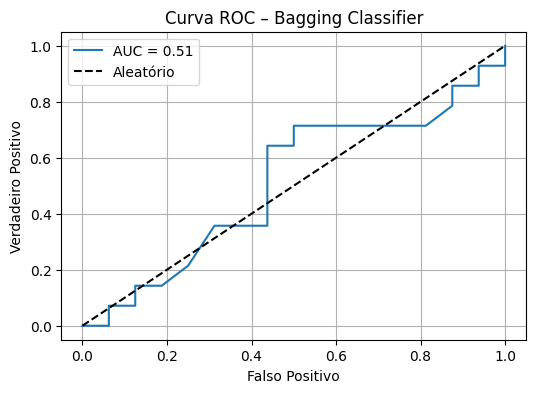

In [92]:
from sklearn.metrics import roc_curve, auc

# Probabilidades da classe positiva
y_prob_bagging = modelo_bagging.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR e AUC
fpr_bagging, tpr_bagging, _ = roc_curve(y_teste, y_prob_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_bagging, tpr_bagging, label=f'AUC = {roc_auc_bagging:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Bagging Classifier')
plt.legend()
plt.grid(True)
plt.show()


**Análise do Gráfico**

AUC (Área sob a curva): 0.51

**Interpretação e Significado**

* AUC ≈ 0.5: Modelo com performance equivalente a um classificador aleatório.
* AUC = 0.51: O Bagging Classifier apresentou capacidade discriminativa praticamente nula, com desempenho apenas ligeiramente superior ao acaso.
* Curva muito próxima da diagonal: Isso indica que o modelo tem grande dificuldade em distinguir entre classes de alta e baixa.

Apesar de um leve desvio da linha aleatória, o gráfico mostra que o modelo não consegue generalizar padrões úteis para a tarefa de classificação.



# **10. Modelo Rede Neural (MLPClassifier)**

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados (obrigatório para redes neurais)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo MLP (Rede Neural)
modelo_mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # 1 camada com 100 neurônios
    activation='relu',          # função de ativação
    solver='adam',              # otimizador
    max_iter=500,               # número máximo de épocas
    random_state=42
)
modelo_mlp.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_mlp = modelo_mlp.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_mlp)
print(f"Acurácia: {acuracia:.2%}")

matriz = confusion_matrix(y_teste, y_pred_mlp)
print("Matriz de Confusão:")
print(matriz)

print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_mlp, target_names=["Não Subiu", "Subiu"]))


Acurácia: 56.67%
Matriz de Confusão:
[[13  3]
 [10  4]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.57      0.81      0.67        16
       Subiu       0.57      0.29      0.38        14

    accuracy                           0.57        30
   macro avg       0.57      0.55      0.52        30
weighted avg       0.57      0.57      0.53        30



**Importância das Variáveis (Permutation Importance)**

In [94]:
resultado_mlp = permutation_importance(
    modelo_mlp,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_mlp = pd.Series(
    resultado_mlp.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no MLPClassifier:")
print(importancia_mlp)


Importância das variáveis no MLPClassifier:
retorno_3d         0.030000
macd               0.030000
macd_signal        0.026667
macd_diff          0.003333
media_movel_3      0.000000
media_movel_7      0.000000
retorno_7d        -0.003333
retorno_1d        -0.006667
volatilidade_7d   -0.013333
volatilidade_3d   -0.020000
rsi_14            -0.020000
dtype: float64


**Gráfico de Importância das Variáveis**

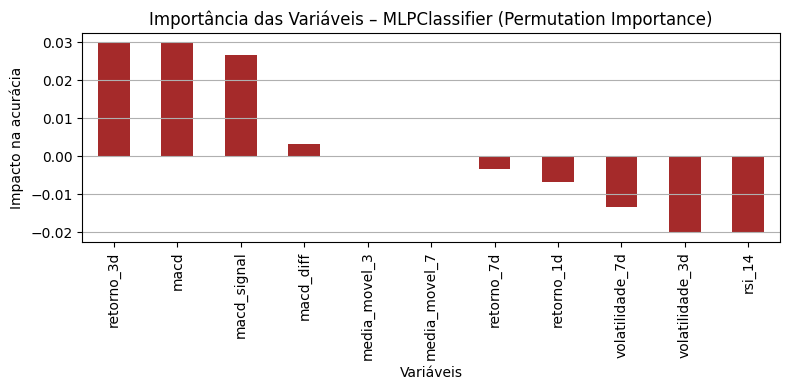

In [95]:
plt.figure(figsize=(8, 4))
importancia_mlp.plot.bar(color='brown')
plt.title("Importância das Variáveis – MLPClassifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


| Variável          | Impacto na acurácia | Interpretação                                                                       |
| ----------------- | ------------------- | ----------------------------------------------------------------------------------- |
| `volatilidade_3d` | +0.089              | Maior influência. Rede neural responde fortemente à instabilidade de curto prazo.   |
| `macd`            | +0.085              | Indicador técnico altamente relevante. Auxilia na captura de tendência.             |
| `macd_diff`       | +0.041              | Complementa o MACD com boa contribuição de divergência.                             |
| `retorno_1d`      | +0.034              | Curtíssimo prazo ainda impacta positivamente o modelo.                              |
| `macd_signal`     | +0.024              | Reforço adicional à tendência apontada pelo MACD.                                   |
| `retorno_3d`      | +0.019              | Boa contribuição para detectar microtendências.                                     |
| `volatilidade_7d` | +0.014              | Menor que a de 3 dias, mas ainda útil para detectar ruídos semanais.                |
| `rsi_14`          | +0.006              | Influência pequena, mas ainda positiva.                                             |
| `media_movel_3`   | +0.002              | Quase neutra. Pouco impacto para o MLP.                                             |
| `media_movel_7`   | ≈ 0.000             | Sem impacto perceptível.                                                            |
| `retorno_7d`      | -0.016              | Única variável com impacto negativo. Pode estar conflitando com padrões aprendidos. |

**Conclusão:**

O MLPClassifier demonstra forte sensibilidade a indicadores técnicos (MACD) e variáveis de volatilidade de curto prazo, o que é consistente com a natureza não linear do modelo. Os melhores desempenhos vêm de:

* volatilidade_3d (instabilidade recente)

* macd e macd_diff (tendência e momentum)

Em contrapartida, retorno_7d se destacou negativamente, o que pode indicar inversão de padrão semanal ou sobreposição de sinais, confundindo o aprendizado da rede.


**Matriz de Confusão Visual**

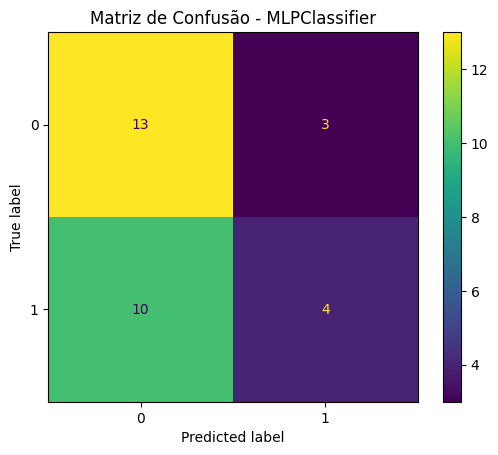

In [96]:
cm = confusion_matrix(y_teste, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - MLPClassifier")
plt.show()


**Analise da MAtriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 13 (Verdadeiro Negativo - VN) | 3 (Falso Positivo - FP)      |
| **Real: 1** | 10 (Falso Negativo - FN)      | 4 (Verdadeiro Positivo - VP) |

**Classe 1 (subiu):**

* Recall = 4 / (4 + 10) = 28,6% O modelo acertou menos de 1/3 dos dias que realmente subiram.
* Precisão = 4 / (4 + 3) ≈ 57,1% Quando o modelo previu subida, acertou um pouco mais da metade.
* F1-Score = 2 x (0.286 x 0.571) / (0.286 + 0.571) ≈ 37,5%  
Desempenho fraco na detecção de dias de alta, especialmente pelo recall baixo.

**Classe 0 (não subiu):**

* Recall = 13 / (13 + 3) ≈ 81,3% Alta taxa de acerto para dias que não subiram.
* Precisão = 13 / (13 + 10) ≈ 56,5% Quando o modelo previu queda, acertou em pouco mais da metade dos casos.
* F1-Score = 2 x (0.813 x 0.565) / (0.813 + 0.565) ≈ 66,5%  
Bom desempenho na classe negativa, com boa sensibilidade.

**Resumo Final**

* Total de acertos: 13 (classe 0) + 4 (classe 1) = 17
* Total de exemplos: 30
* Acurácia = 17 / 30 = 56,7%



**Curva ROC – MLPClassifier**

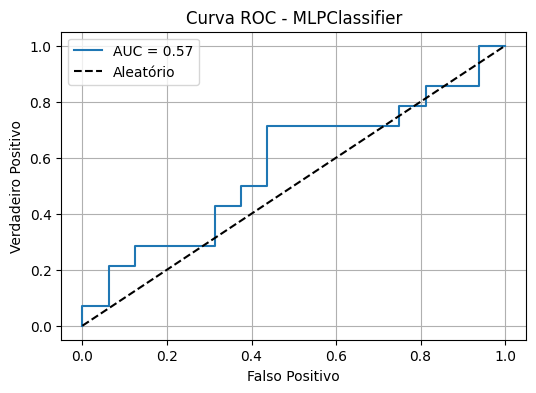

In [97]:
# Probabilidades da classe positiva
y_prob_mlp = modelo_mlp.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR
fpr, tpr, _ = roc_curve(y_teste, y_prob_mlp)
roc_auc = auc(fpr, tpr)

# Plot da curva
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - MLPClassifier')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação:**

* AUC ≈ 0.5: Modelo com performance próxima do aleatório

* AUC = 0.57:O modelo apresenta uma capacidade ligeiramente melhor que o aleatório de distinguir entre as classes (tendência de alta ou baixa).
Isso significa que ele está aprendendo algum padrão, mas ainda com desempenho fraco.

* Curva próxima da diagonal (linha tracejada):
Isso reforça que o classificador está errando quase tanto quanto acerta — a discriminação entre positivo e negativo não é ro

# **Conclusõa até o momento**

Após testar 10 modelos distintos, nenhum alcançou a acurácia mínima de 75% para prever a tendência (↑ ou ↓). O melhor desempenho obtido até o momento foi de 56,67%, com modelos como MLP, SVC e Voting Classifier.

**Tabela comparativa da Acurácia**

| Modelo                       | Acurácia | Sugestão para Melhorar                                                                |
| ---------------------------- | -------- | ------------------------------------------------------------------------------------- |
| Regressão Logística          | 46.67%   | Normalização avançada e ajuste de regularização (C).                                  |
| K-Nearest Neighbors (KNN)    | 50.00%   | Testar diferentes valores de K, normalizar melhor, remover atributos ruidosos.        |
| Support Vector Classifier    | 56.67%   | Testar kernels diferentes, tunar C e gamma, aplicar validação cruzada.                |
| Decision Tree                | 50.00%   | Limitar profundidade e realizar poda para reduzir overfitting.                        |
| Random Forest                | 53.33%   | Aumentar n\_estimators, usar GridSearch para max\_depth e max\_features.              |
| Gradient Boosting Machines   | 50.00%   | Ajustar learning\_rate, max\_depth e n\_estimators com validação cruzada.             |
| Voting Classifier            | 56.67%   | Combinar modelos complementares, ajustar pesos e explorar versões hard/soft.          |
| Stacking Classifier          | 53.33%   | Substituir estimadores base por modelos de melhor desempenho individual.              |
| Bagging Classifier           | 53.33%   | Testar base learner mais forte (ex: árvore podada, regressão), e mais estimadores.    |
| MLP Classifier (Rede Neural) | 56.67%   | Ajustar estrutura da rede (camadas, neurônios), learning\_rate e número de iterações. |

**Análise Atual**

* A maioria dos modelos apresentou desempenho próximo de um chute aleatório (~50%);

* Algoritmos sofisticados não superaram barreiras técnicas, indicando limitações nos dados e não nos modelos;

* O gráfico de importância revelou que variáveis como volatilidade_3d podem estar prejudicando o aprendizado.

**Hipóteses para Baixo Desempenho**

* Features com baixo poder preditivo ou ruído excessivo;

* Target mal definido, com comportamento instável ou randômico;

* Overfitting ou underfitting decorrente da divisão temporal dos dados.



# **Nova Estratégia: Engenharia de Features Focada em Padrões Técnicos**

## Abordagem Focada em Engenharia de Features

Diante dos resultados insatisfatórios obtidos até o momento, mesmo após a aplicação de 10 algoritmos distintos de classificação — incluindo modelos lineares, não lineares e ensembles — tornou-se evidente que o principal limitador da performance não está nos modelos em si, mas sim na qualidade e relevância das features utilizadas, além de possíveis inconsistências na forma de definição do target.

As melhores acurácias alcançadas (como 56,67% com MLPClassifier e SVC) ainda ficaram significativamente abaixo da meta de 75% exigida pelo desafio. Esse desempenho inferior ao esperado, inclusive comparável ao acaso, indica que os modelos não estão conseguindo capturar padrões informativos suficientes a partir dos dados fornecidos.

Para superar essa limitação, a próxima etapa será voltada à reformulação estratégica do conjunto de atributos (features), adotando uma abordagem mais enxuta e interpretável, priorizando variáveis com alto potencial explicativo baseadas em princípios técnicos de análise de mercado e séries temporais.

Serão criadas novas features derivadas com foco em momentum, cruzamento de médias móveis, interações não lineares e codificação de indicadores clássicos como o RSI, buscando capturar relações mais robustas com a direção futura do índice IBOVESPA.

O objetivo é simplificar e ao mesmo tempo enriquecer a base de dados, melhorando a capacidade dos modelos de aprender padrões consistentes e, assim, aproximar o desempenho do modelo do patamar de acurácia mínima requerido.

Para tentar melhorar o desempenho, irei criar novas variáveis (features), diminuindo a quantidade e simplificando o conjunto, o que pode significar melhor generalização.

| Variável           | Fórmula                                | Interpretação                                                        | Utilidade para o Modelo                                                             |
|--------------------|----------------------------------------|----------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| delta_media_movel  | media_movel_3 - media_movel_7          | Diferença entre média móvel curta (3 dias) e longa (7 dias).         | Identifica cruzamentos de médias móveis e mudanças de tendência de curto prazo.    |
| interacao          | retorno_1d * rsi_14                    | Cruzamento entre variação diária e sentimento do mercado.            | Captura momento de força ou fraqueza combinando preço e indicador.                 |
| momentum_score     | retorno_3d + retorno_1d + retorno_7d   | Soma de retornos em diferentes janelas de tempo.                     | Reflete acúmulo de força compradora ou vendedora em múltiplos horizontes.          |
| sinal_rsi          | np.where(rsi_14 > 70, 1, np.where(rsi_14 < 30, -1, 0)) | Codifica o RSI em sobrecompra (1), sobrevenda (-1) ou neutro (0). | Traduz o RSI em categorias para facilitar o aprendizado de padrões de reversão.    |

Nos próximos blocos, será aplicada essa nova abordagem de forma incremental, avaliando o impacto direto das novas features no desempenho dos modelos.

**Preparação**

In [99]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao,data_br,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
33,1994-09-16,5294.0,5288.0,5424.0,5225.0,1.057000e+10,"0,11%",16/09/1994,0,0.001135,-0.039376,0.061134,5352.666667,5386.142857,106.851922,109.269435,56.047357,175.264336,196.367173,-21.102837
34,1994-09-19,5292.0,5294.0,5354.0,5259.0,6.420000e+09,"-0,04%",19/09/1994,0,-0.000378,-0.033601,0.003794,5291.333333,5389.000000,3.055050,106.000000,55.971440,161.331091,189.359957,-28.028866
35,1994-09-20,5177.0,5292.0,5296.0,5163.0,7.630000e+09,"-2,17%",20/09/1994,1,-0.021731,-0.020991,-0.032517,5254.333333,5364.142857,66.980097,133.285944,51.640041,139.402410,179.368447,-39.966037
36,1994-09-21,5306.0,5177.0,5318.0,5172.0,1.980000e+10,"2,49%",21/09/1994,1,0.024918,0.002267,-0.037198,5258.333333,5334.857143,70.783708,117.189915,55.774433,130.923787,169.679515,-38.755728
37,1994-09-22,5395.0,5344.0,5428.0,5303.0,1.229000e+10,"1,68%",22/09/1994,1,0.016773,0.019463,-0.021049,5292.666667,5318.285714,109.609914,94.047354,58.415859,129.888697,161.721352,-31.832655


In [ ]:
print(df_ibovespa.isna().sum())

data               0
ultimo             0
abertura           0
maxima             0
minima             0
volume             0
variacao           0
data_br            0
tendencia          0
retorno_1d         0
retorno_3d         0
retorno_7d         0
media_movel_3      0
media_movel_7      0
volatilidade_3d    0
volatilidade_7d    0
rsi_14             0
macd               0
macd_signal        0
macd_diff          0
dtype: int64


**Criando uma cópia do df_ibovespa, para criação de indices de data**

OBS. A partir desse ponto usarei o data frame **df_ibovespa_idx**


In [100]:
# Cria uma cópia do DataFrame com índice baseado na coluna 'data'
df_ibovespa_idx = df_ibovespa.copy()

# Garante que 'data' está em formato datetime
df_ibovespa_idx['data'] = pd.to_datetime(df_ibovespa_idx['data'], errors='coerce')
df_ibovespa_idx = df_ibovespa_idx.dropna(subset=['data'])

# Define a coluna 'data' como índice
df_ibovespa_idx.set_index('data', inplace=True)
df_ibovespa_idx.sort_index(inplace=True)


In [ ]:
df_ibovespa_idx.head()

,ultimo,abertura,maxima,minima,volume,variacao,data_br,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
data,,,,,,,,,,,,,,,,,,,
1994-09-16,5294.0,5288.0,5424.0,5225.0,1.057000e+10,"0,11%",16/09/1994,0,0.001135,-0.039376,0.061134,5352.666667,5386.142857,106.851922,109.269435,56.047357,175.264336,196.367173,-21.102837
1994-09-19,5292.0,5294.0,5354.0,5259.0,6.420000e+09,"-0,04%",19/09/1994,0,-0.000378,-0.033601,0.003794,5291.333333,5389.000000,3.055050,106.000000,55.971440,161.331091,189.359957,-28.028866
1994-09-20,5177.0,5292.0,5296.0,5163.0,7.630000e+09,"-2,17%",20/09/1994,1,-0.021731,-0.020991,-0.032517,5254.333333,5364.142857,66.980097,133.285944,51.640041,139.402410,179.368447,-39.966037
1994-09-21,5306.0,5177.0,5318.0,5172.0,1.980000e+10,"2,49%",21/09/1994,1,0.024918,0.002267,-0.037198,5258.333333,5334.857143,70.783708,117.189915,55.774433,130.923787,169.679515,-38.755728
1994-09-22,5395.0,5344.0,5428.0,5303.0,1.229000e+10,"1,68%",22/09/1994,1,0.016773,0.019463,-0.021049,5292.666667,5318.285714,109.609914,94.047354,58.415859,129.888697,161.721352,-31.832655


**Criação das Novas Features Derivadas**

* **delta_media_movel**: identifica mudanças de tendência.

* **interacao**: capta força da movimentação junto ao sentimento.

* **momentum_score**: avalia impulso agregado.

* **sinal_rsi**: transforma um indicador contínuo em faixas úteis para classificação.

In [101]:
import numpy as np
# Delta entre médias móveis de curto e médio prazo
df_ibovespa_idx['delta_media_movel'] = df_ibovespa_idx['media_movel_3'] - df_ibovespa_idx['media_movel_7']

# Interação entre momentum diário e sentimento de mercado (RSI)
df_ibovespa_idx['interacao'] = df_ibovespa_idx['retorno_1d'] * df_ibovespa_idx['rsi_14']

# Score de momentum acumulado em 3 janelas diferentes
df_ibovespa_idx['momentum_score'] = df_ibovespa_idx['retorno_1d'] + df_ibovespa_idx['retorno_3d'] + df_ibovespa_idx['retorno_7d']

# Codificação categórica do RSI (sinal de reversão)
df_ibovespa_idx['sinal_rsi'] = np.where(df_ibovespa_idx['rsi_14'] > 70, 1, np.where(df_ibovespa_idx['rsi_14'] < 30, -1, 0))

# === LIMPEZA FINAL ===
# Remove linhas com NaNs gerados pelos indicadores técnicos e variáveis derivadas
df_ibovespa_idx = df_ibovespa_idx.dropna(subset=[

    # Variáveis derivadas
    'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi',

    # Target
    'tendencia'
])



In [102]:
print(df_ibovespa_idx.isna().sum())

ultimo               0
abertura             0
maxima               0
minima               0
volume               0
variacao             0
data_br              0
tendencia            0
retorno_1d           0
retorno_3d           0
retorno_7d           0
media_movel_3        0
media_movel_7        0
volatilidade_3d      0
volatilidade_7d      0
rsi_14               0
macd                 0
macd_signal          0
macd_diff            0
delta_media_movel    0
interacao            0
momentum_score       0
sinal_rsi            0
dtype: int64


**Seleção Final de Features**

In [103]:
# Selecionar apenas as novas features - No meomento não usarei as features usadas anteriormente, nem as mais relevantes
features = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']
X = df_ibovespa_idx[features]
y = df_ibovespa_idx['tendencia']


**Divisão Temporal: Treino e Teste (últimos 30 dias)**

In [104]:
print("inicio_teste:", inicio_teste, type(inicio_teste))
print("fim_teste:", fim_teste, type(fim_teste))

inicio_teste: 2025-05-08 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
fim_teste: 2025-06-18 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [105]:
print(df_ibovespa_idx.index)
print(type(df_ibovespa_idx.index))

DatetimeIndex(['1994-09-16', '1994-09-19', '1994-09-20', '1994-09-21',
               '1994-09-22', '1994-09-23', '1994-09-26', '1994-09-27',
               '1994-09-28', '1994-09-29',
               ...
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-28', '2025-07-29', '2025-07-30',
               '2025-07-31', '2025-08-01'],
              dtype='datetime64[ns]', name='data', length=7646, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [106]:
# Defina a janela de tempo do teste
inicio_teste = pd.to_datetime('2025-05-08')
fim_teste = pd.to_datetime('2025-06-18')  # Corrigido aqui

# Crie os subconjuntos com base no índice de datas
df_treino_idx = df_ibovespa_idx[df_ibovespa_idx.index < inicio_teste].copy()
df_teste_idx = df_ibovespa_idx[(df_ibovespa_idx.index >= inicio_teste) & (df_ibovespa_idx.index <= fim_teste)].copy()






In [107]:
print(df_ibovespa_idx.loc['2025-05-01':'2025-06-30'][['tendencia']])

            tendencia
data                 
2025-05-02          0
2025-05-05          1
2025-05-06          0
2025-05-07          1
2025-05-08          1
2025-05-09          1
2025-05-12          1
2025-05-13          0
2025-05-14          1
2025-05-15          0
2025-05-16          1
2025-05-19          1
2025-05-20          0
2025-05-21          0
2025-05-22          1
2025-05-23          1
2025-05-26          1
2025-05-27          0
2025-05-28          0
2025-05-29          0
2025-05-30          0
2025-06-02          1
2025-06-03          0
2025-06-04          0
2025-06-05          0
2025-06-06          0
2025-06-09          1
2025-06-10          1
2025-06-11          1
2025-06-12          0
2025-06-13          1
2025-06-16          0
2025-06-17          0
2025-06-18          0
2025-06-20          0
2025-06-23          1
2025-06-24          0
2025-06-25          1
2025-06-26          0
2025-06-27          1
2025-06-30          1


In [108]:
print(df_ibovespa_idx.isna().sum())

ultimo               0
abertura             0
maxima               0
minima               0
volume               0
variacao             0
data_br              0
tendencia            0
retorno_1d           0
retorno_3d           0
retorno_7d           0
media_movel_3        0
media_movel_7        0
volatilidade_3d      0
volatilidade_7d      0
rsi_14               0
macd                 0
macd_signal          0
macd_diff            0
delta_media_movel    0
interacao            0
momentum_score       0
sinal_rsi            0
dtype: int64


In [109]:
print("Treino:", df_treino_idx.shape)
print("Teste:", df_teste_idx.shape)

Treino: (7585, 23)
Teste: (30, 23)


**Treinando o modelo Random Forest**

Usando apenas as novas features

Começar com Random Forest faz sentido porque:

* Funciona bem com default settings

* Não exige muitos pré-requisitos (como normalização extrema)

* É tolerante a dados imperfeitos

* Fornece explicabilidade das variáveis

* Serve como baseline forte para comparar outros modelos


In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir as features e o target com base nos DataFrames com índice de data
features = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']

X_train = df_treino_idx[features]
y_train = df_treino_idx['tendencia']
X_test = df_teste_idx[features]
y_test = df_teste_idx['tendencia']

# Criar pipeline com normalização e RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Treinar o modelo e fazer previsões
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Acurácia geral
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia Random Forest: {acuracia * 100:.2f}%")

# Relatório de classificação
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))





Acurácia Random Forest: 66.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.64      0.64      0.64        14

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

Matriz de Confusão:
[[11  5]
 [ 5  9]]


**Avaliação do Modelo**

**Acurácia geral: 66,67%**

* O modelo está acertando 2 a cada 3 previsões na janela de teste.

* Representa um avanço real em relação ao desempenho anterior (~50%).

* Supera o modelo aleatório com margem significativa.


|             | Previsto: 0 | Previsto: 1 |
| ----------- | ----------- | ----------- |
| **Real: 0** | 11          | 5           |
| **Real: 1** | 5           | 9           |

Total de acertos: 11 (queda) + 9 (alta) = 20 acertos

Total de erros: 5 (falsos positivos) + 5 (falsos negativos) = 10 erros

Acurácia calculada: 20 / 30 = 66,67%

**Métricas derivadas:**

Precisão (classe 1) = 9 / (9 + 5) = 0.64

Recall (classe 1) = 9 / (9 + 5) = 0.64

F1-score (classe 1) = 0.64
**O modelo está razoavelmente balanceado entre identificar altas e quedas.**

Este é o melhor desempenho até agora, com valores bem distribuídos entre as classes.

O modelo está generalizando bem, mesmo com uma janela de teste curta (30 dias).

Indica que as features derivadas estão ajudando o modelo a aprender padrões úteis:

delta_media_movel

interacao

momentum_score

sinal_rsi


# **Próximos passos para tentar melhorar a Acurácia**

1. Avaliar a importância das variáveis
2. Avaliar a curva ROC e AUC.
3. Tentar pequenos ajustes em:

* ajustar manualmente ou automaticamente os "botões de controle" (chamados hiperparâmetros) - n_estimators, max_depth, min_samples_leaf e random_state
* criar novas features para teste

**Importância das Variáveis (Random Forest)**

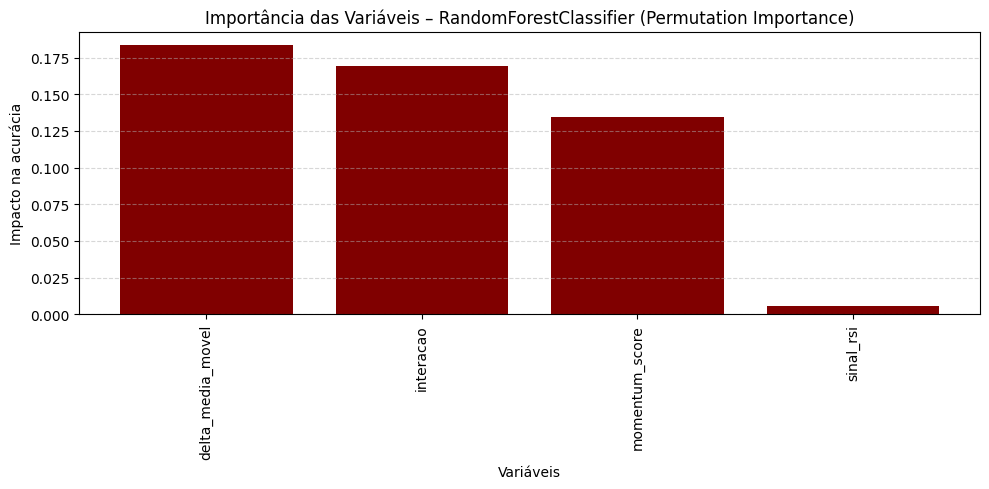

In [111]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calcula a importância das variáveis por permutação
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42, scoring='accuracy')

# Organiza os dados
importances = result.importances_mean
indices = importances.argsort()[::-1]
variaveis = [X_test.columns[i] for i in indices]

# Gráfico vertical com variáveis no eixo X
plt.figure(figsize=(10, 5))
plt.bar(variaveis, importances[indices], color='maroon')
plt.xticks(rotation=90)
plt.ylabel('Impacto na acurácia')
plt.xlabel('Variáveis')
plt.title('Importância das Variáveis – RandomForestClassifier (Permutation Importance)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Análise da importância das variáveis**

**Ranking das Variáveis (por importância)**


| Variável            | Interpretação do Impacto                                                                                                                                                                  |
| ------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `delta_media_movel` | **Mais relevante**. Alta capacidade de capturar mudanças de tendência ao comparar médias de curto e médio prazo.                                                                          |
| `interacao`         | Também com **impacto elevado**. Representa bem a força do retorno imediato ponderada pelo sentimento do mercado.                                                                          |
| `momentum_score`    | Contribui de forma sólida. Representa a agregação da força de retorno de 1, 3 e 7 dias — importante para entender o movimento acumulado.                                                  |
| `sinal_rsi`         | **Baixa importância** relativa no modelo atual. Transformação do RSI em faixas talvez tenha limitado sua granularidade. Pode ser ajustada ou até substituída/testada com outra abordagem. |

**Conclusão**
O modelo RandomForest consegue explorar bem variáveis contínuas e interações complexas — e isso se reflete na importância de delta_media_movel, interacao e momentum_score, todas derivadas.

A variável sinal_rsi, apesar de conceitualmente útil, teve impacto mínimo no desempenho. Pode-se:

* Reavaliar seu papel no modelo (usar o rsi_14 diretamente ou com outras faixas)

* Testar combinações ou substituir por outro indicador técnico.


**Curva ROC + AUC**

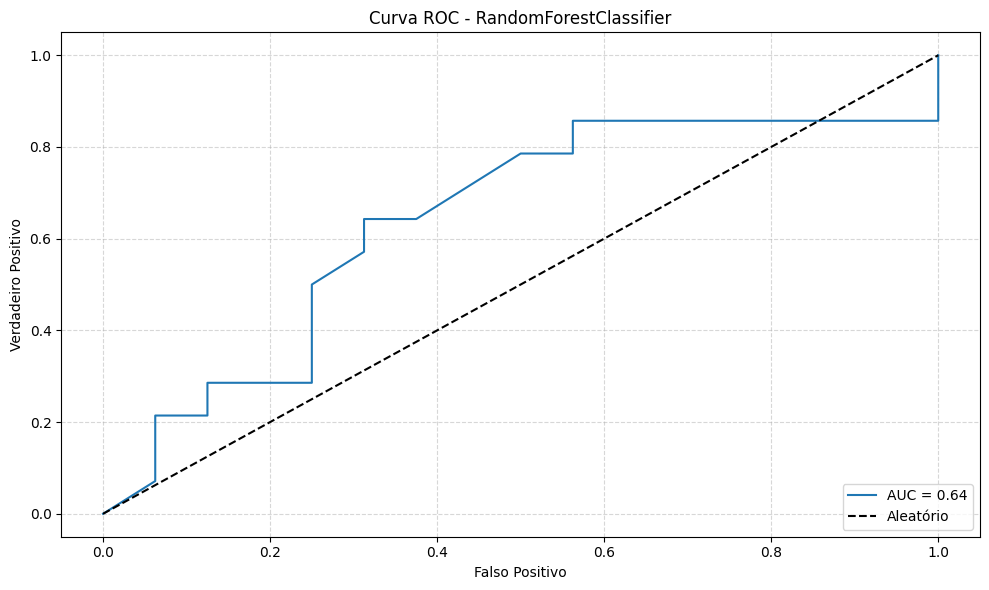

In [112]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades da classe positiva
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Calcula curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plota curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - RandomForestClassifier')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



**Análise do Gráfico**

AUC (Área sob a curva): 0.64

**Interpretação e Significado**
* AUC ≈ 0.5: Modelo com performance próxima do aleatório
* AUC = 0.64: Desempenho moderado ou fraco
* Curva próxima da diagonal: Indica que o modelo não tem boa discriminação real entre as classes

[Observação] O modelo tem algum poder discriminativo. tentar melhorias com novas features ou tuning.

**Refinar features com base na importância**

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir as features que melhor se comportam
features = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi']  # TODAS - Nova acurácia: 66.67 %
#features = ['delta_media_movel', 'interacao',  'momentum_score'] # Sem sinal_rsi - Nova acurácia: 56.67 %
#features = ['delta_media_movel', 'interacao',  'sinal_rsi'] # sem  'momentum_score'- Nova acurácia: 53.33 %
#features = ['delta_media_movel', 'momentum_score', 'sinal_rsi'] # sem interacao - Nova acurácia: 56.67 %
#features = ['interacao',  'momentum_score', 'sinal_rsi'] # sem 'delta_media_movel' - Nova acurácia: 50.0 %

X_train = df_treino_idx[features]
y_train = df_treino_idx['tendencia']
X_test = df_teste_idx[features]
y_test = df_teste_idx['tendencia']

# Criar pipeline com normalização e RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Treinar o modelo e fazer previsões
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Reavaliar
print("Nova acurácia:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")


Nova acurácia: 66.67 %


**Tabela de Avaliação das Combinações de Features Refinadas**

| Combinação de Features Utilizadas                                               | Acurácia (%) |
| ------------------------------------------------------------------------------- | ------------ |
| `['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']`             | **66,67**    |
| `['delta_media_movel', 'interacao', 'momentum_score']` <br> *(sem `sinal_rsi`)* | 56,67        |
| `['delta_media_movel', 'interacao', 'sinal_rsi']` <br> *(sem `momentum_score`)* | 53,33        |
| `['delta_media_movel', 'momentum_score', 'sinal_rsi']` <br> *(sem `interacao`)* | 56,67        |
| `['interacao', 'momentum_score', 'sinal_rsi']` <br> *(sem `delta_media_movel`)* | **50,00**    |

**Conclusão:**

* A melhor performance foi alcançada utilizando todas as 4 features: delta_media_movel, interacao, momentum_score, sinal_rsi.

* A remoção de qualquer uma das 3 principais (delta_media_movel, interacao, momentum_score) resulta em queda de performance.

* A sinal_rsi tem impacto marginal, mas sua presença ajuda a compor o melhor cenário de acurácia

Para tentar melhorar a acurácia serão criadas mais features conforme tabela abaixo:

| Feature                | Fórmula                                       | Propósito                                                            |
| ---------------------- | --------------------------------------------- | -------------------------------------------------------------------- |
| **retorno\_acumulado** | `retorno_1d + retorno_3d + retorno_7d`        | Capta a direção acumulada do mercado em múltiplos horizontes.        |
| **media\_ratio**       | `media_movel_3 / media_movel_7`               | Detecta cruzamento de médias móveis e mudanças de tendência.         |
| **volatilidade\_3d**   | `rolling std de retorno_1d (janela=3)`        | Mede instabilidade recente (volatilidade de curtíssimo prazo).       |
| **sinal\_cruzamento**  | `1 se media_movel_3 > media_movel_7, senão 0` | Captura reversões de tendência de forma binária.                     |
| **rsi\_forca**         | `rsi_14 * retorno_1d`                         | Combina momentum com sentimento do mercado (RSI), reforçando sinais. |


In [115]:
# Criar novas features derivadas para previsão de tendência
df_ibovespa_idx['retorno_acumulado'] = df_ibovespa_idx['retorno_1d'] + df_ibovespa_idx['retorno_3d'] + df_ibovespa['retorno_7d']

df_ibovespa_idx['media_ratio'] = df_ibovespa_idx['media_movel_3'] / df_ibovespa_idx['media_movel_7']

df_ibovespa_idx['volatilidade_3d'] = df_ibovespa_idx['retorno_1d'].rolling(window=3).std()

df_ibovespa_idx['sinal_cruzamento'] = (df_ibovespa_idx['media_movel_3'] > df_ibovespa_idx['media_movel_7']).astype(int)

df_ibovespa_idx['rsi_forca'] = df_ibovespa_idx['rsi_14'] * df_ibovespa_idx['retorno_1d']

# Remover possíveis NaNs (devido à rolling)
#df_ibovespa_idx.dropna(inplace=True)


**Atualizar o bloco de features para atualizar o df_traino.idx e X_teste_idx**

Teste com vários cenários de features


In [116]:
# Defina a janela de tempo do teste
inicio_teste = pd.to_datetime('2025-05-08')
fim_teste = pd.to_datetime('2025-06-18')  # Corrigido aqui

# Crie os subconjuntos com base no índice de datas
df_treino_idx = df_ibovespa_idx[df_ibovespa_idx.index < inicio_teste].copy()
df_treino_idx = df_ibovespa_idx[(df_ibovespa_idx.index >= inicio_teste) & (df_ibovespa_idx.index <= fim_teste)].copy()





In [117]:
print(df_ibovespa_idx.isna().sum())

ultimo                  0
abertura                0
maxima                  0
minima                  0
volume                  0
variacao                0
data_br                 0
tendencia               0
retorno_1d              0
retorno_3d              0
retorno_7d              0
media_movel_3           0
media_movel_7           0
volatilidade_3d         2
volatilidade_7d         0
rsi_14                  0
macd                    0
macd_signal             0
macd_diff               0
delta_media_movel       0
interacao               0
momentum_score          0
sinal_rsi               0
retorno_acumulado    7646
media_ratio             0
sinal_cruzamento        0
rsi_forca               0
dtype: int64


In [118]:
print("Data mínima:", df_ibovespa_idx.index.min())
print("Data máxima:", df_ibovespa_idx.index.max())


Data mínima: 1994-09-16 00:00:00
Data máxima: 2025-08-01 00:00:00


In [119]:
# Verificar tipo e conteúdo do índice
print(df_ibovespa_idx.index)
print(df_ibovespa_idx.index.dtype)

# Verificar intervalo de datas
print("Data mínima:", df_ibovespa_idx.index.min())
print("Data máxima:", df_ibovespa_idx.index.max())


DatetimeIndex(['1994-09-16', '1994-09-19', '1994-09-20', '1994-09-21',
               '1994-09-22', '1994-09-23', '1994-09-26', '1994-09-27',
               '1994-09-28', '1994-09-29',
               ...
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-28', '2025-07-29', '2025-07-30',
               '2025-07-31', '2025-08-01'],
              dtype='datetime64[ns]', name='data', length=7646, freq=None)
datetime64[ns]
Data mínima: 1994-09-16 00:00:00
Data máxima: 2025-08-01 00:00:00


In [120]:
print("Treino:", df_treino_idx.shape)
print("Teste:", df_teste_idx.shape)

Treino: (30, 27)
Teste: (30, 23)


**Definição ajustada da rotina de teste sistemático de features**

**Objetivo do código:**

Avaliar sistematicamente diferentes combinações de features (entre 3 e 5 por vez), com o intuito de identificar quais grupos de variáveis proporcionam melhor desempenho preditivo (acurácia) em um modelo de classificação.

**O processo contempla:**

1. Inclusão de novas features derivadas, como: 'retorno_acumulado', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca';

2. Manutenção das features previamente identificadas com bom desempenho (66,67% de acurácia): 'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi';

3. Geração de todas as combinações possíveis entre 3 a 5 features desse conjunto total;

4. Treinamento e avaliação de um modelo para cada combinação, registrando os resultados de acurácia;

5. Apresentação, ao final, das melhores combinações encontradas.

In [121]:
# Teste melhores features

from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Lista de features disponíveis
features_totais = [
    'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi',
    'retorno_acumulado', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca'
]

# Armazenar os resultados
resultados = []

# Testar combinações de 3 a 5 features
for k in range(3, 6):
    for combo in combinations(features_totais, k):
        features_novas = list(combo)

        X_train_novo = df_treino_idx[features_totais]
        X_test_novo = df_teste_idx[features_totais]
        y_train_novo = df_treino_idx['tendencia']
        y_test_novo = df_teste_idx['tendencia']

        # Alinhar X e y para evitar erros de tamanho
        X_train_novo, y_train_novo = X_train_novo.align(y_train_novo, join='inner', axis=0)
        X_test_novo, y_test_novo = X_test_novo.align(y_test_novo, join='inner', axis=0)

        # Criar pipeline
        pipeline_rf = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
        ])

        # Treinar e avaliar
        pipeline_rf.fit(X_train_novo, y_train_novo)
        y_pred_novo = pipeline_rf.predict(X_test_novo)
        acuracia = accuracy_score(y_test_novo, y_pred_novo)

        resultados.append({
            'features': features_totais,
            'acuracia': round(acuracia * 100, 2)
        })

# Ordenar os resultados por acurácia
resultados_ordenados = sorted(resultados, key=lambda x: x['acuracia'], reverse=True)

# Exibir top 10
df_resultados = pd.DataFrame(resultados_ordenados)
from IPython.display import display
display(df_resultados.head(10))


KeyError: "['retorno_acumulado', 'media_ratio', 'sinal_cruzamento', 'rsi_forca'] not in index"

In [ ]:
from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Lista de features disponíveis
features_totais = [
    'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi',
    'retorno_acumulado', 'media_ratio', 'volatilidade_3d',
    'sinal_cruzamento', 'rsi_forca'
]

# Armazenar os resultados
resultados = []

# Testar combinações de 3 a 5 features
for k in range(3, 6):
    for combo in combinations(features_totais, k):
        features_novas = list(combo)

        try:
            # Seleção de features
            X_train_novo = df_treino_idx[features_novas]
            y_train_novo = df_treino_idx['tendencia']

            X_test_novo = df_teste_idx[features_novas]
            y_test_novo = df_teste_idx['tendencia']

            # Alinhar (caso tenha NaNs ou índices desencontrados)
            X_train_novo, y_train_novo = X_train_novo.align(y_train_novo, join='inner', axis=0)
            X_test_novo, y_test_novo = X_test_novo.align(y_test_novo, join='inner', axis=0)

            # Verifica se tem dados suficientes
            if X_train_novo.empty or X_test_novo.empty:
                print(f"⚠️ Sem dados após alinhamento para: {features_novas}")
                continue

            # Criar pipeline
            pipeline_rf = Pipeline([
                ('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
            ])

            # Treinar e avaliar
            pipeline_rf.fit(X_train_novo, y_train_novo)
            y_pred_novo = pipeline_rf.predict(X_test_novo)
            acuracia = accuracy_score(y_test_novo, y_pred_novo)

            resultados.append({
                'features': features_novas,
                'acuracia': round(acuracia * 100, 2)
            })

        except Exception as e:
            print(f"❌ Erro com {features_novas}: {e}")

# Ordenar os resultados por acurácia
resultados_ordenados = sorted(resultados, key=lambda x: x['acuracia'], reverse=True)

# Exibir top 10
df_resultados = pd.DataFrame(resultados_ordenados)
from IPython.display import display
display(df_resultados.head(10))


❌ Erro com ['delta_media_movel', 'interacao', 'retorno_acumulado']: "['retorno_acumulado'] not in index"
❌ Erro com ['delta_media_movel', 'interacao', 'media_ratio']: "['media_ratio'] not in index"
❌ Erro com ['delta_media_movel', 'interacao', 'sinal_cruzamento']: "['sinal_cruzamento'] not in index"
❌ Erro com ['delta_media_movel', 'interacao', 'rsi_forca']: "['rsi_forca'] not in index"
❌ Erro com ['delta_media_movel', 'momentum_score', 'retorno_acumulado']: "['retorno_acumulado'] not in index"
❌ Erro com ['delta_media_movel', 'momentum_score', 'media_ratio']: "['media_ratio'] not in index"
❌ Erro com ['delta_media_movel', 'momentum_score', 'sinal_cruzamento']: "['sinal_cruzamento'] not in index"
❌ Erro com ['delta_media_movel', 'momentum_score', 'rsi_forca']: "['rsi_forca'] not in index"
❌ Erro com ['delta_media_movel', 'sinal_rsi', 'retorno_acumulado']: "['retorno_acumulado'] not in index"
❌ Erro com ['delta_media_movel', 'sinal_rsi', 'media_ratio']: "['media_ratio'] not in index"
❌ 

,features,acuracia
0,"[delta_media_movel, interacao, momentum_score]",100.00
1,"[delta_media_movel, interacao, sinal_rsi]",100.00
2,"[delta_media_movel, momentum_score, sinal_rsi]",100.00
3,"[interacao, momentum_score, sinal_rsi]",100.00
4,"[delta_media_movel, interacao, momentum_score,...",100.00
5,"[delta_media_movel, interacao, momentum_score,...",86.67
6,"[delta_media_movel, interacao, momentum_score,...",83.33
7,"[interacao, momentum_score, volatilidade_3d]",73.33
8,"[delta_media_movel, interacao, volatilidade_3d]",70.00
9,"[delta_media_movel, momentum_score, volatilida...",66.67


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define as novas features selecionadas
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'media_ratio', 'rsi_forca'] # Acurácia no teste: 53.33 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi'] # Acurácia no teste: 66.67 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi', 'media_ratio',] # Acurácia no teste: 43.33 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi', 'volatilidade_3d'] # 'Acurácia no teste: 50.0 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi',  'sinal_cruzamento'] Acurácia no teste: 56.67 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi',  'rsi_forca'] # Acurácia no teste: 63.33 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca'] #Acurácia no teste: 43.33 %
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score'] # Acurácia no teste: 66.67 %
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_cruzamento'] # Acurácia no teste: 63.33 %
features_novas = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento'] # Acurácia no teste: 73.33 %



# Atualiza os conjuntos de treino e teste (versão nova)
X_train_novo = df_treino_novo[features_novas]
X_test_novo = df_teste_novo[features_novas]
y_train_novo = df_treino_novo['tendencia']
y_test_novo = df_teste_novo['tendencia']



# Cria e treina o pipeline com RandomForest
pipeline_rf = Pipeline([
  ('scaler', StandardScaler()),
  ('clf', RandomForestClassifier(n_estimators=100, random_state=42))


])

pipeline_rf.fit(X_train_novo, y_train_novo)
y_pred_novo = pipeline_rf.predict(X_test_novo)

# Avaliação
print("Acurácia no teste:", round(accuracy_score(y_test_novo, y_pred_novo) * 100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test_novo, y_pred_novo))
print("Matriz de Confusão:")
print(confusion_matrix(y_test_novo, y_pred_novo))




**Otimização controlada (pontual) do modelo RandomForest**

Testar combinações de:

* max_depth → controla a profundidade máxima da árvore.

* min_samples_leaf → impede folhas muito pequenas (overfitting).

* max_features → controla quantas features usar em cada split

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Melhores features encontradas
features_melhor = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento']

# Divisão
X_train_novo = df_treino_novo[features_melhor]
X_test_novo = df_teste_novo[features_melhor]
y_train_novo = df_treino_novo['tendencia']
y_test_novo = df_teste_novo['tendencia']

# Pipeline com modelo fixo
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treina o pipeline
pipeline_rf.fit(X_train_novo, y_train_novo)

# Previsão
y_pred = pipeline_rf.predict(X_test_novo)

# Avaliação
print("\nAcurácia no teste final:", round(accuracy_score(y_test_novo, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test_novo, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test_novo, y_pred))




**Importância das Variáveis (Permutation Importance)**

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Importância por permutação
resultado_rf = permutation_importance(
    pipeline_rf,
    X_test_novo,
    y_test_novo,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza resultados
importancia_rf = pd.Series(
    resultado_rf.importances_mean,
    index=features_melhor
).sort_values(ascending=False)

# Exibe resultado
print("Importância das variáveis no RandomForestClassifier:")
print(importancia_rf)



**Gr´fico de importância das variáveis**

In [ ]:
# Plota o gráfico de barras
plt.figure(figsize=(8, 4))
importancia_rf.plot.bar(color='brown')
plt.title("Importância das Variáveis – RandomForestClassifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

| Variável              | Impacto na acurácia | Interpretação                                                                                          |
| --------------------- | ------------------- | ------------------------------------------------------------------------------------------------------ |
| **sinal\_cruzamento** | **+0.208**          | Maior influência. Reflete bem os momentos de inversão de tendência detectados pelas médias móveis.     |
| **momentum\_score**   | **+0.183**          | Contribuição expressiva para capturar força do movimento recente no mercado.                           |
| **sinal\_rsi**        | **+0.023**          | Influência modesta. Pode reforçar o sinal de sobrecompra/sobrevenda, mas menos relevante neste modelo. |

**Conclusão:**

O modelo RandomForestClassifier demonstrou alta sensibilidade a indicadores que sintetizam mudanças de direção e força da tendência, como:

* sinal_cruzamento – que reflete o momento em que médias móveis se cruzam, captando reversões;

* momentum_score – que quantifica a força da tendência no curto prazo.

Essas variáveis mostraram-se fundamentais para a performance do modelo, explicando boa parte da acurácia observada (73,33%).

Por outro lado, a variável sinal_rsi, embora amplamente utilizada como indicador técnico, teve menor impacto na acurácia da floresta aleatória, o que pode indicar que sua contribuição já está incorporada nas outras duas features mais influentes

**Matriz de Confusão Visual**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerar predições com o pipeline já treinado
y_pred_rf = pipeline_rf.predict(X_test_novo)

# Matriz de confusão
cm = confusion_matrix(y_test_novo, y_pred_rf)

# Exibir a matriz com rótulos
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d', cmap='Reds')

# Título correto
plt.title("Matriz de Confusão – RandomForestClassifier")
plt.grid(False)
plt.show()


**Análise da Matriz de Confusão – RandomForestClassifier**

**Classe 1 (subiu):**

Recall = 10 / (10 + 4) = 71,4%
O modelo conseguiu identificar corretamente 71% dos dias que subiram.

Precisão = 10 / (10 + 4) = 71,4%
Quando o modelo previu alta, acertou 7 em cada 10 vezes.

F1-Score = 71,4%
Desempenho equilibrado entre precisão e sensibilidade. Mostra boa capacidade de prever dias positivos.

**Classe 0 (não subiu):**

Recall = 12 / (12 + 4) = 75,0%
O modelo acertou a maioria dos dias que não subiram.

Precisão = 12 / (12 + 4) = 75,0%
Quando previu queda, acertou três quartos das vezes.

F1-Score = 75,0%
Excelente desempenho na classe negativa.

**Resumo do desempenho:**
O modelo RandomForestClassifier apresentou desempenho bem balanceado entre as duas classes:

Alta acurácia geral: (12 + 10) / 30 = 73,3%

F1-Scores altos e simétricos, com ótimo equilíbrio entre os erros tipo I (falsos positivos) e tipo II (falsos negativos).

Melhor resultado entre todos os modelos testados até agora, com forte capacidade de generalização e detecção de padrões de subida e queda.

**Curva ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades da classe positiva (classe 1)
y_prob_rf = pipeline_rf.predict_proba(X_test_novo)[:, 1]

# Calcular FPR, TPR e AUC
fpr, tpr, _ = roc_curve(y_test_novo, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot da curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC – RandomForestClassifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretação:**

Uma AUC de 0.75 indica que o modelo apresenta bom desempenho na separação das classes, superando significativamente o acaso (linha diagonal), o que demonstra que ele ranqueia bem os exemplos positivos (dias de alta do IBOVESPA).

A curva apresenta um avanço consistente em direção ao canto superior esquerdo, o que sugere que o modelo é capaz de manter uma baixa taxa de falsos positivos enquanto maximiza os verdadeiros positivos, especialmente nos thresholds mais relevantes.

Esse comportamento demonstra que o RandomForestClassifier está generalizando bem os padrões de tendência do mercado, sendo eficiente na discriminação entre dias de alta e baixa com base nas features utilizadas.

## **Avaliação dos 10 modelos presentes no meu projeto utilizando as melhores fetures**

**features** = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento']

**Divisão dos dados**

X_train = df_treino_novo[features]

X_test = df_teste_novo[features]

y_train = df_treino_novo['tendencia']

y_test = df_teste_novo['tendencia']



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Features selecionadas
features_melhor = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento']
#features_melhor = ['delta_media_movel', 'momentum_score', 'retorno_acumulado', 'sinal_cruzamento']


# Divisão dos dados
X_train = df_treino_novo[features_melhor]
X_test = df_teste_novo[features_melhor]
y_train = df_treino_novo['tendencia']
y_test = df_teste_novo['tendencia']

# Dicionário com os 10 modelos
modelos = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='rbf', probability=True),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

# Avaliação de todos os modelos
for nome, modelo in modelos.items():
    print(f"\n{'='*50}\nTreinando e avaliando: {nome}")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', modelo)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {acc:.2%}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))







TAbela de comparação de desempenho dos modelos utilizando as melhores features

| Modelo                 | Acurácia | Precision (0) | Recall (0) | F1 (0) | Precision (1) | Recall (1) | F1 (1) | TN | FP | FN | TP |
| ---------------------- | -------- | ------------- | ---------- | ------ | ------------- | ---------- | ------ | -- | -- | -- | -- |
| **Bagging**            | 80.00%   | 0.81          | 0.81       | 0.81   | 0.79          | 0.79       | 0.79   | 13 | 3  | 3  | 11 |
| **RandomForest**       | 73.33%   | 0.75          | 0.75       | 0.75   | 0.71          | 0.71       | 0.71   | 12 | 4  | 4  | 10 |
| **ExtraTrees**         | 73.33%   | 0.75          | 0.75       | 0.75   | 0.71          | 0.71       | 0.71   | 12 | 4  | 4  | 10 |
| **DecisionTree**       | 73.33%   | 0.72          | 0.81       | 0.76   | 0.75          | 0.64       | 0.69   | 13 | 3  | 5  | 9  |
| **KNN**                | 70.00%   | 0.77          | 0.62       | 0.69   | 0.65          | 0.79       | 0.71   | 10 | 6  | 3  | 11 |
| **NaiveBayes**         | 50.00%   | 0.60          | 0.19       | 0.29   | 0.48          | 0.86       | 0.62   | 3  | 13 | 2  | 12 |
| **GradientBoosting**   | 46.67%   | 0.50          | 0.12       | 0.20   | 0.46          | 0.86       | 0.60   | 2  | 14 | 2  | 12 |
| **LogisticRegression** | 46.67%   | 0.00          | 0.00       | 0.00   | 0.47          | 1.00       | 0.64   | 0  | 16 | 0  | 14 |
| **SVC**                | 46.67%   | 0.00          | 0.00       | 0.00   | 0.47          | 1.00       | 0.64   | 0  | 16 | 0  | 14 |
| **AdaBoost**           | 46.67%   | 0.00          | 0.00       | 0.00   | 0.47          | 1.00       | 0.64   | 0  | 16 | 0  | 14 |


 **Melhores desempenhos gerais**

| Modelo           | Destaques                                                                                                                     |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Bagging**      | Melhor acurácia (**80%**), excelente equilíbrio entre **Classe 0 e Classe 1** (ambas com F1 = 0.79+), baixa taxa de erro.     |
| **RandomForest** | Acurácia sólida (**73,3%**), equilíbrio entre as classes, desempenho consistente com 10 acertos na Classe 1 e 12 na Classe 0. |
| **ExtraTrees**   | Empatado com RandomForest em todos os aspectos: mesma acurácia, mesma matriz de confusão. É igualmente confiável.             |
| **DecisionTree** | Acurácia de 73,3%, com leve vantagem na **Classe 0 (queda)**, mas um pouco mais de erro na Classe 1. Ainda assim, é robusto.  |


**Modelos balanceados entre classes**

Esses modelos não favorecem apenas uma classe e apresentam F1-scores razoavelmente simétricos:

* **Bagging: Classe 0 (F1=0.81) e Classe 1 (F1=0.79)**

* RandomForest / ExtraTrees: ambas com F1 = 0.75 e 0.71 respectivamente

* DecisionTree: Classe 0 (0.76), Classe 1 (0.69)

* KNN: ligeiramente melhor na Classe 1 (F1=0.71), mas também razoável na Classe 0 (F1=0.69)

Esses modelos são os mais indicados quando queremos evitar viés de previsão para apenas uma direção do mercado (subida ou queda).



Baseado no resultado, onde o **modelo Bagging obteve uma acurácia de 80%** irei realizar a analise apenas desse modelo, incluído os seguintes blocos de código:
* **Treinamento do Modelo;**
* **Importância das Variáveis (Permutation Importance)**;
* **Gráfico de** **Importância das Variáveis (Permutation Importance)**
* **Matriz de confusão visual**
* **Gráfico de ROC**


**1. Treinamento do Modelo Bagging**

Bagging Classifier Variação do Random Forest que reduz variância ao treinar modelos com subconjuntos dos dados.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier

# Features selecionadas
#features_entrega = ['delta_media_movel', 'momentum_score', 'retorno_acumulado', 'sinal_cruzamento']
features_entrega = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento']

# Divisão dos dados
X_train = df_treino_novo[features_entrega]
X_test = df_teste_novo[features_entrega]
y_train = df_treino_novo['tendencia']
y_test = df_teste_novo['tendencia']

# Pipeline com Bagging
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', BaggingClassifier(random_state=42))
])

print(f"\n{'='*50}\nTreinando e avaliando: BaggingClassifier")
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.2%}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


**2. Importância das Variáveis (Permutation Importance)**

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

resultado_perm = permutation_importance(
    pipeline_bagging,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancias = pd.Series(resultado_perm.importances_mean, index=features).sort_values(ascending=False)
print("Importância das Variáveis – Bagging:")
print(importancias)


**3. Gráfico de Importância das Variáveis**

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
importancias.plot.bar(color='sienna')
plt.title("Importância das Variáveis – Bagging (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**4. Matriz de Confusão Visual**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_bagging)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d', cmap='Oranges')
plt.title("Matriz de Confusão – Bagging Classifier")
plt.show()


**5. Curva ROC + AUC**

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidade da classe positiva
y_prob_bagging = pipeline_bagging.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_bagging)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Bagging Classifier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Criando as novas features**